# CAO Points Comparison 2019, 2020 and 2021.
***
## Author: Fionn McCarthy - G00301126

***
***
# 1. Introduction and Background
The Central Application Office (CAO) is the department tasked with the job of processing applications for Irish Higher Education Institutions (HEIs) from Leaving Certificate students who apply for courses in Ireland for that academic year, the Leaving Certificate is a points based system on the examinations undertaken in that particular year [1]. In this jupyter notebook I will extract the relevant points achieved by students in each of the years 2019, 2020 and 2021 and give a detailed comparison of the results obtained across those years. 

It has been reported that across the board in subjects the number of top level marks or H1's given out in the Leaving Certificate has increase each year dramatically in 2020 and 2021 such as the core subjects (irish, english and mathematics) where the percentage receiving H1s was 4.7% in 2017, 4.3% in 2018, 4.6% in 2019, 7.3% in 2020 and then a staggering 11.5% in 2021 [2]. I will investiagte in this notebook how this has effect the CAO points in each year below.

In section two I will ectract the points from source, in section three I will combine the three years of data into one pandas dataframe, in section four I will carry out the comparison of the points across the three years and in the final; section five I will give my conclusion to my analysis.

To add some context to some of the terms utilized and abbreviations utilized in this jupyter notebook. when it comes to points across each year 'EOS' stands for End of Season which represents the lowest points achieved by a student offered a place on that particular course. 'MID' or 'Mid-point' stands for the median (middle) points achieved for all the students who were offered a place on that particular course. 
***
***

Below shows the libraries imported to carry out the relevant analysis.

In [1]:
# Regular expressions 
import re

# Working with HTTP 
import requests as rq

# Data frames 
import pandas as pd

# Date and time library
import datetime as dt 

# For downloading from URl
import urllib.request as urlrq

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

#style to use thoughout notebook 
plt.style.use('ggplot')

***
***
# 2. Loading in the Data for 2019, 2020 and 2021.
***
***
## 2021 CAO Data

### The link to the CAO points 2021 can be acccessed **[here](http://www.cao.ie/index.php?page=points&p=2021)**.
Over the course of the assignment the data for the 2021 Leaving Certificate points changed format on the website from HTML to Excel format. For the purpose of this analysis I think it would be good idea to show how both formats can be extracted. In this case I will first show how regular expressions was utilized to extract the 2021 CAO data in HTML form and then show how the Excel file was converted into data for the purpose of this analysis.

In [2]:
# Retrieve the CAO points from the URl below
CAO1 = rq.get('http://www2.cao.ie/points/l8.php')

# View the above is okay, 200 means all okay. 
CAO1 

<Response [200]>

### Get the date and time of right now, in order to use for file creation time throughout notebook.
The datetime library is usesd in order to take a back up of the data retrieved from the CAO website.The reason the datetime library is used is to back up the data each time the notebook is run as to not overwrite the data. 

In [3]:
# date and time of right now.
now = dt.datetime.now()

# Formatting now as a string.
nowstring = now.strftime('%Y%m%d_%H%M%S')

### Saving the Original Data Set 

The server advises to utilize charset 'iso-8859-1' in order to decode the but from research this charset is unable to decode \x96 as it is not defined so we use 'cp1252' instead.

In [4]:
# Setting the charset to decode with 
CAO1.encoding = 'cp1252'

In [5]:
# Setting the charset to decode with 
CAO1.encoding = 'cp1252'

# Creating a file path for the data.
path2021_html = 'data/cao2021_' + nowstring + '.html'

# Saving the original html file before going any further. 
with open(path2021_html, 'w') as f:
    f.write(CAO1.text)

### Regular expressions selects the lines in the we want to keep.

In [6]:
# The regular expression is compiled below 
re_expr = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')

In [7]:
# Path creation for the csv file.
path2021_csv = 'data/cao2021_csv_' + nowstring + '.csv'

Looping through lines 

In [8]:
# Keep track of how many courses we process.
no_lines = 0

# Open and write to the cvs file
with open(path2021_csv, 'w') as f:
    # Write a header row for data set
    f.write(','.join(['code', 'title', 'points_r1', 'points_r2']) + '\n')
    # Loop through lines of the response
    for line in CAO1.iter_lines():
        # Decode using cp1252
        dline = line.decode('cp1252')
        # Match only the lines representing courses.
        if re_expr.fullmatch(dline):
            # Add one to the lines counter.
            no_lines = no_lines + 1
            # The course code, first five characters in string
            course_code = dline[:5]
            # The course title
            course_title = dline[7:57].strip()
            # Course points split on one or more spaces after character 60
            course_points = re.split('  +', dline[60:]) 
            if len(course_points) != 2:
                course_points = course_points[:2]
            # join the fields using a comma 
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            # Rejoin the substrings with commas in between.
            f.write(','.join(linesplit) + '\n')
        
print(no_lines)

949


#### The above count of 949 courses was verified by a manual count that was carried out in visual studio code on original html file.

In [9]:
# Read csv file into 2021 dataframe
df2021 = pd.read_csv(path2021_csv, encoding='cp1252')

### 2021 Data change of Format on CAO website to excel, I will show how I converted this into data to be utlized in the analysis for this assignment.

In [10]:
# Creating a file path for the excel data.
path2021_excel = 'data/cao2021_' + nowstring + '.xlsx'

In [11]:
# https://stackoverflow.com/questions/19602931/basic-http-file-downloading-and-saving-to-disk-in-python [3]
# Save original file
urlrq.urlretrieve("http://www2.cao.ie/points/CAOPointsCharts2021.xlsx", path2021_excel) 

('data/cao2021_20220102_173724.xlsx',
 <http.client.HTTPMessage at 0x1ee74de28b0>)

In [12]:
# Download and parse the excel spreadsheet
# From examining the excel file I noted that needed to skip the first 10 trows of excel file that is loaded into dataframe
df2021_2 = pd.read_excel('http://www2.cao.ie/points/CAOPointsCharts2021.xlsx', skiprows = 11)

In [13]:
df2021_2

,CATEGORY (ISCED Description),Course Title,Course Code,R1 Points,R1 Random,R2 Points,R2 Random,EOS Points,EOS Random,EOS Midpoints,Course Level,HEI,Test/Interview,AVP,v
0,Engineering and engineering trades,Music and Instrument Technology,AL605,211,NaN,NaN,NaN,211,NaN,319,6,Athlone Institute of Technology,NaN,NaN,NaN
1,Health,Pharmacy Technician,AL630,308,NaN,NaN,NaN,308,NaN,409,6,Athlone Institute of Technology,NaN,NaN,NaN
2,Health,Dental Nursing,AL631,311,NaN,NaN,NaN,311,NaN,400,6,Athlone Institute of Technology,NaN,NaN,NaN
3,Biological and related sciences,Applied Science,AL632,297,NaN,NaN,NaN,297,NaN,454,6,Athlone Institute of Technology,NaN,NaN,NaN
4,Business and administration,Business,AL650,AQA,NaN,AQA,NaN,AQA,NaN,351,6,Athlone Institute of Technology,NaN,avp,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,Information and Communication Technologies (ICTs),Creative Computing,WD211,270,NaN,NaN,NaN,270,NaN,392,8,Waterford Institute of Technology,NaN,NaN,NaN
1447,Personal services,Recreation and Sport Management,WD212,262,NaN,NaN,NaN,262,NaN,304,8,Waterford Institute of Technology,NaN,NaN,NaN
1448,Engineering and engineering trades,Mechanical and Manufacturing Engineering,WD230,230,NaN,230,NaN,230,NaN,361,8,Waterford Institute of Technology,NaN,avp,NaN
1449,Welfare,Early Childhood Care and Education,WD231,266,NaN,NaN,NaN,266,NaN,366,8,Waterford Institute of Technology,NaN,NaN,NaN


In [14]:
# Check of bottom value of 2021 file is correct
df2021_2.iloc[-1]

CATEGORY (ISCED Description)          Business and administration
Course Title                         Business Information Systems
Course Code                                                 WD232
R1 Points                                                     261
R1 Random                                                     NaN
R2 Points                                                     261
R2 Random                                                     NaN
EOS Points                                                    261
EOS Random                                                    NaN
EOS Midpoints                                                 329
Course Level                                                    8
HEI                             Waterford Institute of Technology
Test/Interview                                                NaN
AVP                                                           avp
v                                                             NaN
Name: 1450

In [15]:
df2021_2.dtypes

CATEGORY (ISCED Description)    object
Course Title                    object
Course Code                     object
R1 Points                       object
R1 Random                       object
R2 Points                       object
R2 Random                       object
EOS Points                      object
EOS Random                      object
EOS Midpoints                   object
Course Level                     int64
HEI                             object
Test/Interview                  object
AVP                             object
v                               object
dtype: object

In [16]:
df2021_2.columns

Index(['CATEGORY (ISCED Description)', 'Course Title', 'Course Code',
       'R1 Points', 'R1 Random', 'R2 Points ', 'R2 Random', 'EOS Points',
       'EOS Random', 'EOS Midpoints', 'Course Level', 'HEI', 'Test/Interview',
       'AVP', 'v'],
      dtype='object')

In [17]:
# https://stackoverflow.com/questions/44117326/how-can-i-remove-all-non-numeric-characters-from-all-the-values-in-a-particular [4]
# Remove characters in columns that are non-numeric. 
# Note there is a space at end of Round 2 points col name
df2021_2['EOS Points'] = df2021_2['EOS Points'].replace('[A-Z.#*+a-z]', '', regex = True)
df2021_2['R1 Points'] = df2021_2['R1 Points'].replace('[A-Z.#*+a-z]', '', regex = True)
df2021_2['R2 Points '] = df2021_2['R2 Points '].replace('[A-Z.#*+a-z]', '', regex = True)
df2021_2['EOS Midpoints'] = df2021_2['EOS Midpoints'].replace('[A-Z.#*+a-z]', '', regex = True)

In [18]:
df2021_2

,CATEGORY (ISCED Description),Course Title,Course Code,R1 Points,R1 Random,R2 Points,R2 Random,EOS Points,EOS Random,EOS Midpoints,Course Level,HEI,Test/Interview,AVP,v
0,Engineering and engineering trades,Music and Instrument Technology,AL605,211,NaN,NaN,NaN,211,NaN,319,6,Athlone Institute of Technology,NaN,NaN,NaN
1,Health,Pharmacy Technician,AL630,308,NaN,NaN,NaN,308,NaN,409,6,Athlone Institute of Technology,NaN,NaN,NaN
2,Health,Dental Nursing,AL631,311,NaN,NaN,NaN,311,NaN,400,6,Athlone Institute of Technology,NaN,NaN,NaN
3,Biological and related sciences,Applied Science,AL632,297,NaN,NaN,NaN,297,NaN,454,6,Athlone Institute of Technology,NaN,NaN,NaN
4,Business and administration,Business,AL650,,NaN,,NaN,,NaN,351,6,Athlone Institute of Technology,NaN,avp,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,Information and Communication Technologies (ICTs),Creative Computing,WD211,270,NaN,NaN,NaN,270,NaN,392,8,Waterford Institute of Technology,NaN,NaN,NaN
1447,Personal services,Recreation and Sport Management,WD212,262,NaN,NaN,NaN,262,NaN,304,8,Waterford Institute of Technology,NaN,NaN,NaN
1448,Engineering and engineering trades,Mechanical and Manufacturing Engineering,WD230,230,NaN,230,NaN,230,NaN,361,8,Waterford Institute of Technology,NaN,avp,NaN
1449,Welfare,Early Childhood Care and Education,WD231,266,NaN,NaN,NaN,266,NaN,366,8,Waterford Institute of Technology,NaN,NaN,NaN


In [19]:
# https://www.kite.com/python/answers/how-to-replace-each-empty-string-in-a-pandas-dataframe-with-nan-in-python [5]
# Replace all blank strings with nulls in dataset
df2021_2 = df2021_2.replace(r'^\s*$', np.NaN, regex=True)

In [20]:
# Conver columns to floats
df2021_2['EOS Points'] = df2021_2['EOS Points'].astype(float)
df2021_2['R1 Points'] = df2021_2['R1 Points'].astype(float)
df2021_2['R2 Points '] = df2021_2['R2 Points '].astype(float)
df2021_2['EOS Midpoints'] = df2021_2['EOS Midpoints'].astype(float)


In [21]:
df2021_2.dtypes

CATEGORY (ISCED Description)     object
Course Title                     object
Course Code                      object
R1 Points                       float64
R1 Random                        object
R2 Points                       float64
R2 Random                        object
EOS Points                      float64
EOS Random                       object
EOS Midpoints                   float64
Course Level                      int64
HEI                              object
Test/Interview                   object
AVP                              object
v                                object
dtype: object

In [22]:
df2021_2

,CATEGORY (ISCED Description),Course Title,Course Code,R1 Points,R1 Random,R2 Points,R2 Random,EOS Points,EOS Random,EOS Midpoints,Course Level,HEI,Test/Interview,AVP,v
0,Engineering and engineering trades,Music and Instrument Technology,AL605,211.0,NaN,NaN,NaN,211.0,NaN,319.0,6,Athlone Institute of Technology,NaN,NaN,NaN
1,Health,Pharmacy Technician,AL630,308.0,NaN,NaN,NaN,308.0,NaN,409.0,6,Athlone Institute of Technology,NaN,NaN,NaN
2,Health,Dental Nursing,AL631,311.0,NaN,NaN,NaN,311.0,NaN,400.0,6,Athlone Institute of Technology,NaN,NaN,NaN
3,Biological and related sciences,Applied Science,AL632,297.0,NaN,NaN,NaN,297.0,NaN,454.0,6,Athlone Institute of Technology,NaN,NaN,NaN
4,Business and administration,Business,AL650,NaN,NaN,NaN,NaN,NaN,NaN,351.0,6,Athlone Institute of Technology,NaN,avp,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,Information and Communication Technologies (ICTs),Creative Computing,WD211,270.0,NaN,NaN,NaN,270.0,NaN,392.0,8,Waterford Institute of Technology,NaN,NaN,NaN
1447,Personal services,Recreation and Sport Management,WD212,262.0,NaN,NaN,NaN,262.0,NaN,304.0,8,Waterford Institute of Technology,NaN,NaN,NaN
1448,Engineering and engineering trades,Mechanical and Manufacturing Engineering,WD230,230.0,NaN,230.0,NaN,230.0,NaN,361.0,8,Waterford Institute of Technology,NaN,avp,NaN
1449,Welfare,Early Childhood Care and Education,WD231,266.0,NaN,NaN,NaN,266.0,NaN,366.0,8,Waterford Institute of Technology,NaN,NaN,NaN


In [23]:
# taking first 2 characters in Course Code column and outputting to new column hei_code column of df
df2021_2['hei_code'] = df2021_2['Course Code'].str[:2]
df2021_2

,CATEGORY (ISCED Description),Course Title,Course Code,R1 Points,R1 Random,R2 Points,R2 Random,EOS Points,EOS Random,EOS Midpoints,Course Level,HEI,Test/Interview,AVP,v,hei_code
0,Engineering and engineering trades,Music and Instrument Technology,AL605,211.0,NaN,NaN,NaN,211.0,NaN,319.0,6,Athlone Institute of Technology,NaN,NaN,NaN,AL
1,Health,Pharmacy Technician,AL630,308.0,NaN,NaN,NaN,308.0,NaN,409.0,6,Athlone Institute of Technology,NaN,NaN,NaN,AL
2,Health,Dental Nursing,AL631,311.0,NaN,NaN,NaN,311.0,NaN,400.0,6,Athlone Institute of Technology,NaN,NaN,NaN,AL
3,Biological and related sciences,Applied Science,AL632,297.0,NaN,NaN,NaN,297.0,NaN,454.0,6,Athlone Institute of Technology,NaN,NaN,NaN,AL
4,Business and administration,Business,AL650,NaN,NaN,NaN,NaN,NaN,NaN,351.0,6,Athlone Institute of Technology,NaN,avp,NaN,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,Information and Communication Technologies (ICTs),Creative Computing,WD211,270.0,NaN,NaN,NaN,270.0,NaN,392.0,8,Waterford Institute of Technology,NaN,NaN,NaN,WD
1447,Personal services,Recreation and Sport Management,WD212,262.0,NaN,NaN,NaN,262.0,NaN,304.0,8,Waterford Institute of Technology,NaN,NaN,NaN,WD
1448,Engineering and engineering trades,Mechanical and Manufacturing Engineering,WD230,230.0,NaN,230.0,NaN,230.0,NaN,361.0,8,Waterford Institute of Technology,NaN,avp,NaN,WD
1449,Welfare,Early Childhood Care and Education,WD231,266.0,NaN,NaN,NaN,266.0,NaN,366.0,8,Waterford Institute of Technology,NaN,NaN,NaN,WD


Validated, above is correct when compared to file.

#### Save Pandas Dataframe for 2021 Excel data  

In [24]:
# Creating a file path for the pandas data.
path2021_2_csv = 'data/cao2021_2_' + nowstring + '.csv'

In [25]:
# Save pandas dataframe to folder
df2021_2.to_csv(path2021_2_csv)


***
## 2020 CAO Data
### The link to the CAO points 2020 can be acccessed **[here](http://www.cao.ie/index.php?page=points&p=2020)**.

#### Save Original 2020 Data

In [26]:
# Creating a file path for the excel data.
path2020_excel = 'data/cao2020_' + nowstring + '.xlsx'

In [27]:
# https://stackoverflow.com/questions/19602931/basic-http-file-downloading-and-saving-to-disk-in-python
# Save original file
urlrq.urlretrieve("http://www2.cao.ie/points/CAOPointsCharts2020.xlsx", path2020_excel) 

('data/cao2020_20220102_173724.xlsx',
 <http.client.HTTPMessage at 0x1ee74d95b80>)

#### Load Spreadhseet using Pandas

In [28]:
# Download and parse the excel spreadsheet
# From examining the excel file I noted that needed to skip the first 10 trows of excel file that is loaded into dataframe
df2020 = pd.read_excel('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx', skiprows = 10)

In [29]:
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df2020.iloc[-1]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Mechanical and Manufacturing Engineering
COURSE CODE2                                                           WD230
R1 POINTS                                                                253
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      253
EOS Random *                                                             NaN
EOS Mid-point                                                            369
LEVEL                                                                      8
HEI                                        Waterford Institute of Technology
Test/Interview #                                                         NaN

In [31]:
df2020.dtypes

CATEGORY (i.e.ISCED description)     object
COURSE TITLE                         object
COURSE CODE2                         object
R1 POINTS                            object
R1 Random *                          object
R2 POINTS                            object
R2 Random*                           object
EOS                                  object
EOS Random *                         object
EOS Mid-point                        object
LEVEL                                 int64
HEI                                  object
Test/Interview #                     object
avp                                  object
v                                    object
Column1                             float64
Column2                             float64
Column3                             float64
Column4                             float64
Column5                             float64
Column6                             float64
Column7                             float64
Column8                         

In [32]:
# https://stackoverflow.com/questions/44117326/how-can-i-remove-all-non-numeric-characters-from-all-the-values-in-a-particular [6]
# Remove characters in columns that are non-numeric. 
# Note there is a space at end of Round 2 points col name
df2020['EOS'] = df2020['EOS'].replace('[A-Z.#*+a-z]', '', regex = True)
df2020['R1 POINTS'] = df2020['R1 POINTS'].replace('[A-Z.#*+a-z]', '', regex = True)
df2020['R2 POINTS'] = df2020['R2 POINTS'].replace('[A-Z.#*+a-z]', '', regex = True)
df2020['EOS Mid-point'] = df2020['EOS Mid-point'].replace('[A-Z.#*+a-z]', '', regex = True)

# https://www.kite.com/python/answers/how-to-replace-each-empty-string-in-a-pandas-dataframe-with-nan-in-python [7]
# Replace all blank strings with nulls in dataset
df2020 = df2020.replace(r'^\s*$', np.NaN, regex = True)

# Conver EOS column to float 
df2020['EOS'] = df2020['EOS'].astype(float)
df2020['R1 POINTS'] = df2020['R1 POINTS'].astype(float)
df2020['R2 POINTS'] = df2020['R2 POINTS'].astype(float)
df2020['EOS Mid-point'] = df2020['EOS Mid-point'].astype(float)

In [33]:
df2020.dtypes

CATEGORY (i.e.ISCED description)     object
COURSE TITLE                         object
COURSE CODE2                         object
R1 POINTS                           float64
R1 Random *                          object
R2 POINTS                           float64
R2 Random*                           object
EOS                                 float64
EOS Random *                         object
EOS Mid-point                       float64
LEVEL                                 int64
HEI                                  object
Test/Interview #                     object
avp                                  object
v                                    object
Column1                             float64
Column2                             float64
Column3                             float64
Column4                             float64
Column5                             float64
Column6                             float64
Column7                             float64
Column8                         

In [34]:
# taking first 2 characters in Course Code column and outputting to new column hei_code column of df
df2020['hei_code'] = df2020['COURSE CODE2'].str[:2]
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,hei_code
0,Business and administration,International Business,AC120,209.0,NaN,NaN,NaN,209.0,NaN,280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC
1,Humanities (except languages),Liberal Arts,AC137,252.0,NaN,NaN,NaN,252.0,NaN,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AD
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AD
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188.0,NaN,NaN,NaN,188.0,NaN,339.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279.0,NaN,NaN,NaN,279.0,NaN,337.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271.0,NaN,NaN,NaN,271.0,NaN,318.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD
1462,Personal services,Recreation and Sport Management,WD212,270.0,NaN,NaN,NaN,270.0,NaN,349.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD


#### Save Pandas Dataframe

In [35]:
# Creating a file path for the pandas data.
path2020_csv = 'data/cao2020_' + nowstring + '.csv'

In [36]:
# Save pandas datafram to folder
df2020.to_csv(path2020_csv)

***
# 2019 CAO Data

### The link to the CAO points 2019 can be acccessed **[here](http://www.cao.ie/index.php?page=points&p=2019)**.
The level 8 data and the level 6 and 7 data are held on two different files so I will first manipulate the level 8 data and then the level 6 and 7 data. 
### Level 8 data


#### In order to reproduce the data these are the steps I followed 
1. Download the original level 8 PDF file from the CAO website (link above). 
2. Open the original file using Microsoft Word. 
3. When open in Word, save the document as a word document. 
4. Re-save the Word document for editing.
5. Delete headers and page numbers in footer.
6. Select all in document and copy. 
7. Paste into Notepad++.
8. Remove institution name lines and blank lines.
9. In column headings, replace 'COURSE AND INSTITUTION' with 'Course', save file into folder as a csv file.
10. Change backticks to apostrophes. 
11. Delete tabs at end of lines: 61, 64, 169, 171, 172, 200, 335, 352, 425, 433, 700, 701, 752, 793, 830, 837, 869 and 894. 
12. Remove tab after 'Mid' first line.
13. Remove double tab on line 37.
14. Delete tabs at end of lines: 28, 107, 178, 201, 266, 370, 373, 391, 415, 437, 464, 494, 518, 535, 557, 571, 604, 625, 670, 679, 689, 785, 795
15. This data was then validated by pasting original data into visual studio code and getting the same number of rows.

In [37]:
df2019 = pd.read_csv('data/cao2019_20211130_205230_edited.csv', sep='\t')

# Adding a column to the dataframe specifying the course level, here level 8
df2019['Level'] = 8

df2019

,Course Code,Course,EOS,Mid,Level
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0,8
1,AL802,Software Design with Cloud Computing,301,306.0,8
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0,8
3,AL805,Network Management and Cloud Infrastructure,329,442.0,8
4,AL810,Quantity Surveying,307,349.0,8
...,...,...,...,...,...
925,WD200,Arts (options),221,296.0,8
926,WD210,Software Systems Development,271,329.0,8
927,WD211,Creative Computing,275,322.0,8
928,WD212,Recreation and Sport Management,274,311.0,8


### Level 6 & 7 data

#### In order to reproduce the data these are the steps I followed 
1. Download the original level 6 & 7 PDF file from the CAO website (link above). 
2. Open the original file using Microsoft Word. 
3. When open in Word, save the document as a word document. 
4. Re-save the Word document for editing.
5. Delete headers and page numbers in footer.
6. Select all in document and copy. 
7. Paste into Notepad++.
8. Remove institution name lines and blank lines.
9. In column headings, replace 'COURSE AND INSTITUTION' with 'Course', save file into folder as a csv file.
10. Remove tab after 'Mid' first line.
11. Delete tabs at end of lines: 31, 67, 69, 104, 108, 124, 157, 158, 174, 220, 224, 225, 228, 249, 294, 295, 328, 331, 365, 366, 410 and 433. 
12. This data was then validated by pasting original data into visual studio code and getting the same number of rows.

In [38]:
df2019_67 = pd.read_csv('data/cao2019_67_20211203_222130_edited.csv', sep='\t')

# Adding a column to the dataframe specifying the course level, here level 6 and 7
df2019_67['Level'] = '6 or 7'

df2019_67

,Course Code,Course,EOS,Mid,Level
0,AL600,Software Design,205,306.0,6 or 7
1,AL601,Computer Engineering,196,272.0,6 or 7
2,AL602,Mechanical Engineering,258,424.0,6 or 7
3,AL604,Civil Engineering,252,360.0,6 or 7
4,AL630,Pharmacy Technician,306,366.0,6 or 7
...,...,...,...,...,...
456,WD188,Applied Health Care,206,339.0,6 or 7
457,WD205,Molecular Biology with Biopharmaceutical Science,208,441.0,6 or 7
458,WD206,Electronic Engineering,191,322.0,6 or 7
459,WD207,Mechanical Engineering,179,330.0,6 or 7


### Combining both 2019 dataframes into one containing level 6, level 7 and level 8 data.

In [39]:
# Combine both dataframes
df2019 = pd.concat([df2019, df2019_67], ignore_index=True)
df2019

,Course Code,Course,EOS,Mid,Level
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0,8
1,AL802,Software Design with Cloud Computing,301,306.0,8
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0,8
3,AL805,Network Management and Cloud Infrastructure,329,442.0,8
4,AL810,Quantity Surveying,307,349.0,8
...,...,...,...,...,...
1386,WD188,Applied Health Care,206,339.0,6 or 7
1387,WD205,Molecular Biology with Biopharmaceutical Science,208,441.0,6 or 7
1388,WD206,Electronic Engineering,191,322.0,6 or 7
1389,WD207,Mechanical Engineering,179,330.0,6 or 7


Manipulate 2019 data to take out # and * from column and create new columns. Just leave numbers in points col.

In [40]:
# Find a record with a '#' in EOS column of data set, use this to test code below. 
df2019.loc[df2019['Course Code']=='AL763']

,Course Code,Course,EOS,Mid,Level
957,AL763,Graphic Design (portfolio),#626,820.0,6 or 7


In [41]:
# Find a record with a '*' in EOS column of data set, use this to test code below. 
df2019.loc[df2019['Course Code']=='CK201']

,Course Code,Course,EOS,Mid,Level
124,CK201,Commerce,465*,489.0,8


In [42]:
# https://stackoverflow.com/questions/44117326/how-can-i-remove-all-non-numeric-characters-from-all-the-values-in-a-particular
# Remove characters in EOS column that are not numeric. 
df2019['EOS'] = df2019['EOS'].str.extract('(\d+)', expand=False)

In [43]:
# Validate if this worked
df2019.loc[df2019['Course Code']=='CK201']

,Course Code,Course,EOS,Mid,Level
124,CK201,Commerce,465,489.0,8


In [44]:
# Validate if this worked
df2019.loc[df2019['Course Code']=='AL763']

,Course Code,Course,EOS,Mid,Level
957,AL763,Graphic Design (portfolio),626,820.0,6 or 7


In [45]:
df2019

,Course Code,Course,EOS,Mid,Level
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0,8
1,AL802,Software Design with Cloud Computing,301,306.0,8
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0,8
3,AL805,Network Management and Cloud Infrastructure,329,442.0,8
4,AL810,Quantity Surveying,307,349.0,8
...,...,...,...,...,...
1386,WD188,Applied Health Care,206,339.0,6 or 7
1387,WD205,Molecular Biology with Biopharmaceutical Science,208,441.0,6 or 7
1388,WD206,Electronic Engineering,191,322.0,6 or 7
1389,WD207,Mechanical Engineering,179,330.0,6 or 7


In [46]:
df2019.dtypes

Course Code     object
Course          object
EOS             object
Mid            float64
Level           object
dtype: object

In [47]:
# Conver EOS column to float 
df2019['EOS'] = df2019['EOS'].astype(float)

In [48]:
df2019.dtypes

Course Code     object
Course          object
EOS            float64
Mid            float64
Level           object
dtype: object

In [49]:
df2019

,Course Code,Course,EOS,Mid,Level
0,AL801,Software Design with Virtual Reality and Gaming,304.0,328.0,8
1,AL802,Software Design with Cloud Computing,301.0,306.0,8
2,AL803,Software Design with Mobile Apps and Connected...,309.0,337.0,8
3,AL805,Network Management and Cloud Infrastructure,329.0,442.0,8
4,AL810,Quantity Surveying,307.0,349.0,8
...,...,...,...,...,...
1386,WD188,Applied Health Care,206.0,339.0,6 or 7
1387,WD205,Molecular Biology with Biopharmaceutical Science,208.0,441.0,6 or 7
1388,WD206,Electronic Engineering,191.0,322.0,6 or 7
1389,WD207,Mechanical Engineering,179.0,330.0,6 or 7


The 2019 data does not contain the institution name so I will use the course code and 2020 data in order to retrieve these higher education institute (HEI) names. 

In [50]:
# taking first 2 characters in Course Code column and outputting to new column hei_code column of df
df2019['hei_code'] = df2019['Course Code'].str[:2]
df2019

,Course Code,Course,EOS,Mid,Level,hei_code
0,AL801,Software Design with Virtual Reality and Gaming,304.0,328.0,8,AL
1,AL802,Software Design with Cloud Computing,301.0,306.0,8,AL
2,AL803,Software Design with Mobile Apps and Connected...,309.0,337.0,8,AL
3,AL805,Network Management and Cloud Infrastructure,329.0,442.0,8,AL
4,AL810,Quantity Surveying,307.0,349.0,8,AL
...,...,...,...,...,...,...
1386,WD188,Applied Health Care,206.0,339.0,6 or 7,WD
1387,WD205,Molecular Biology with Biopharmaceutical Science,208.0,441.0,6 or 7,WD
1388,WD206,Electronic Engineering,191.0,322.0,6 or 7,WD
1389,WD207,Mechanical Engineering,179.0,330.0,6 or 7,WD


#### Save Pandas Dataframe

In [51]:
# Creating a file path for the pandas data.
path2019_csv = 'data/cao2019_' + nowstring + '.csv'

# Save pandas datafram to folder
df2019.to_csv(path2019_csv)

***
***
# 3. Third Level Courses Available. 
***
***
In this section of I will show how the data was combined togetehr in other to get to one dataframe to be utilized for the main comparison analysis as part of this assignment. 
## 3.1 Creating a dataframe containing all courses that places were offered on over the three years.

In [52]:
# Create df for course in each year
courses2021 = df2021_2[['Course Code', 'Course Title', 'HEI', 'hei_code']]
courses2021.columns = ['code', 'title', 'hei', 'hei_code']

courses2020 = df2020[['COURSE CODE2', 'COURSE TITLE', 'HEI', 'hei_code']]
courses2020.columns = ['code', 'title', 'hei', 'hei_code']

courses2019 = df2019[['Course Code', 'Course', 'hei_code']]
courses2019.columns = ['code', 'title', 'hei_code']
courses2019

# Combine all three years of courses
allcourses = pd.concat([courses2021, courses2020, courses2019], ignore_index=True)
allcourses

# Sort values by code 
allcourses.sort_values('code')

# Finds all extra copies of duplicated rows.
allcourses[allcourses.duplicated()]

# Returns a copy of the data frame with duplciates removed.
allcourses.drop_duplicates()

# Finds all extra copies of duplicated rows.
allcourses[allcourses.duplicated(subset=['code'])]

# Returns a copy of the data frame with duplciates removed - based only on code.
# We must ignore index in order to not bring through index
allcourses.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)
allcourses

,code,title,hei,hei_code
0,AL605,Music and Instrument Technology,Athlone Institute of Technology,AL
1,AL630,Pharmacy Technician,Athlone Institute of Technology,AL
2,AL631,Dental Nursing,Athlone Institute of Technology,AL
3,AL632,Applied Science,Athlone Institute of Technology,AL
4,AL650,Business,Athlone Institute of Technology,AL
...,...,...,...,...
1807,SG432,Environmental Protection,NaN,SG
1808,SG438,Applied Archaeology,NaN,SG
1809,TL712,Computing with Digital Media,NaN,TL
1810,TL719,Culinary Arts,NaN,TL


In [53]:
allcourses[allcourses['hei'].isna()]

,code,title,hei,hei_code
1558,AL853,Accounting and Law,NaN,AL
1559,CW178,Sport Science (options),NaN,CW
1560,CK116,Sports Studies and Physical Education,NaN,CK
1561,CK502,Food Marketing and Entrepreneurship,NaN,CK
1562,CK506,International Development and Food Policy,NaN,CK
...,...,...,...,...
1807,SG432,Environmental Protection,NaN,SG
1808,SG438,Applied Archaeology,NaN,SG
1809,TL712,Computing with Digital Media,NaN,TL
1810,TL719,Culinary Arts,NaN,TL


I will utilize the same logic as above in order to populated the null values for the HEI name that were not brought over from 2019 dataframe as you can see from above some values in the hei column contain NaN (null values). I will use the 2020 and 2021 data in order to retrieve the HEI name and join it on to the dataframe below. 

In [54]:
#Create an array just with courses
colleges2021 = df2021_2[['HEI', 'hei_code']]
colleges2021.columns = ['hei', 'hei_code']

colleges2020 = df2020[['HEI', 'hei_code']]
colleges2020.columns = ['hei', 'hei_code']

colleges2019 = df2019[['hei_code']]


# Combine all three years of courses
allcolleges = pd.concat([colleges2021, colleges2020, colleges2020], ignore_index=True)
allcolleges

# Sort values by code 
allcolleges.sort_values('hei_code')

# Finds all extra copies of duplicated rows.
allcolleges[allcolleges.duplicated()]

# Returns a copy of the data frame with duplciates removed.
allcolleges.drop_duplicates()

# Finds all extra copies of duplicated rows.
allcolleges[allcolleges.duplicated(subset=['hei_code'])]

# Returns a copy of the data frame with duplciates removed - based only on code.
# We must ignore index in order to not bring through index
allcolleges.drop_duplicates(subset=['hei_code'], inplace=True, ignore_index=True)

allcolleges.columns = ['hei2', 'hei_code']

# Set the index to the code column.
allcolleges.set_index('hei_code', inplace=True)
allcolleges

,hei2
hei_code,
AL,Athlone Institute of Technology
CW,"Institute of Technology, Carlow"
PC,"Carlow College, St. Patrick`s"
CR,Cork Institute of Technology
CK,University College Cork (NUI)
AC,American College
CT,CCT College Dublin
CM,Marino Institute of Education
DS,Dorset College


In [55]:
# Set the index to the code column.
allcourses.set_index('hei_code', inplace=True)
allcourses

,code,title,hei
hei_code,,,
AL,AL605,Music and Instrument Technology,Athlone Institute of Technology
AL,AL630,Pharmacy Technician,Athlone Institute of Technology
AL,AL631,Dental Nursing,Athlone Institute of Technology
AL,AL632,Applied Science,Athlone Institute of Technology
AL,AL650,Business,Athlone Institute of Technology
...,...,...,...
SG,SG432,Environmental Protection,NaN
SG,SG438,Applied Archaeology,NaN
TL,TL712,Computing with Digital Media,NaN


In [56]:
allcourses = allcourses.join(allcolleges)
allcourses

,code,title,hei,hei2
hei_code,,,,
AC,AC120,International Business,American College,American College
AC,AC137,Liberal Arts,American College,American College
AD,AD101,"First Year Art and Design (Common Entry,portfo...",National College of Art and Design,National College of Art and Design
AD,AD102,Graphic Design and Moving Image Design (portfo...,National College of Art and Design,National College of Art and Design
AD,AD103,Textile and Surface Design and Jewellery and O...,National College of Art and Design,National College of Art and Design
...,...,...,...,...
WD,WD231,Early Childhood Care and Education,Waterford Institute of Technology,Waterford Institute of Technology
WD,WD232,Business Information Systems,Waterford Institute of Technology,Waterford Institute of Technology
WD,WD139,Civil Engineering,Waterford Institute of Technology,Waterford Institute of Technology


In [57]:
# https://stackoverflow.com/questions/40245507/python-pandas-selecting-rows-whose-column-value-is-null-none-nan [8]
null_hei = allcourses[allcourses['hei2'].isna()]

In [58]:
null_hei

,code,title,hei,hei2
hei_code,,,,
BN,BN101,Business,NaN,NaN
BN,BN103,Business and Information Technology,NaN,NaN
BN,BN104,Computing (Information Technology),NaN,NaN
BN,BN107,Applied Social Studies in Social Care,NaN,NaN
BN,BN108,Engineering (Common Entry with Award options),NaN,NaN
...,...,...,...,...
TA,TA312,Computing,NaN,NaN
TA,TA313,Information Technology Management,NaN,NaN
TA,TA314,Pharmaceutical Science,NaN,NaN


In [59]:
# https://www.machinelearningplus.com/pandas/pandas-reset-index/ [9]
null_hei = null_hei.reset_index()
null_hei

,hei_code,code,title,hei,hei2
0,BN,BN101,Business,NaN,NaN
1,BN,BN103,Business and Information Technology,NaN,NaN
2,BN,BN104,Computing (Information Technology),NaN,NaN
3,BN,BN107,Applied Social Studies in Social Care,NaN,NaN
4,BN,BN108,Engineering (Common Entry with Award options),NaN,NaN
...,...,...,...,...,...
185,TA,TA312,Computing,NaN,NaN
186,TA,TA313,Information Technology Management,NaN,NaN
187,TA,TA314,Pharmaceutical Science,NaN,NaN
188,TA,TA315,DNA and Forensic Analysis,NaN,NaN


In [60]:
# Count distinct hei codes in null_hei
print(null_hei['hei_code'].unique())

['BN' 'DT' 'TA']


From review of the 2019 dataset I found BA to be 'Technological University Dublin Blanchardstown Campus', DT to be 'Technological University Dublin City Campus' and TA to be 'Technological University Dublin Tallaght Campus'. I will 

In [61]:
allcourses = allcourses.reset_index()
allcourses

,hei_code,code,title,hei,hei2
0,AC,AC120,International Business,American College,American College
1,AC,AC137,Liberal Arts,American College,American College
2,AD,AD101,"First Year Art and Design (Common Entry,portfo...",National College of Art and Design,National College of Art and Design
3,AD,AD102,Graphic Design and Moving Image Design (portfo...,National College of Art and Design,National College of Art and Design
4,AD,AD103,Textile and Surface Design and Jewellery and O...,National College of Art and Design,National College of Art and Design
...,...,...,...,...,...
1807,WD,WD231,Early Childhood Care and Education,Waterford Institute of Technology,Waterford Institute of Technology
1808,WD,WD232,Business Information Systems,Waterford Institute of Technology,Waterford Institute of Technology
1809,WD,WD139,Civil Engineering,Waterford Institute of Technology,Waterford Institute of Technology
1810,WD,WD149,Early Childhood Studies,Waterford Institute of Technology,Waterford Institute of Technology


In [62]:
allcourses.loc[allcourses.hei_code == 'BN', ['hei2']] = 'Technological University Dublin Blanchardstown Campus'
allcourses.loc[allcourses.hei_code == 'DT', ['hei2']] = 'Technological University Dublin City Campus'
allcourses.loc[allcourses.hei_code == 'TA', ['hei2']] = 'Technological University Dublin Tallaght Campus'

In [63]:
null_hei2 = allcourses[allcourses['hei2'].isna()]
null_hei2

,hei_code,code,title,hei,hei2


In [64]:
# Count of null values in columns as sanity check
hei_null = allcourses['hei2'].isnull().sum(axis = 0)
hei_code_null = allcourses['hei_code'].isnull().sum(axis = 0)
title_null = allcourses['title'].isnull().sum(axis = 0)
code_null = allcourses['code'].isnull().sum(axis = 0)
print(hei_null, hei_code_null, title_null, code_null)

0 0 0 0


All the course in the dataframe are filled in and we can now rearrange dataframe below before joining on our points data.

In [65]:
# Rearranging dataframe
allcourses = allcourses.reset_index()
allcourses = allcourses[['code', 'title', 'hei2', 'hei_code']]
allcourses.columns = ['code', 'title','hei', 'hei_code']
allcourses

,code,title,hei,hei_code
0,AC120,International Business,American College,AC
1,AC137,Liberal Arts,American College,AC
2,AD101,"First Year Art and Design (Common Entry,portfo...",National College of Art and Design,AD
3,AD102,Graphic Design and Moving Image Design (portfo...,National College of Art and Design,AD
4,AD103,Textile and Surface Design and Jewellery and O...,National College of Art and Design,AD
...,...,...,...,...
1807,WD231,Early Childhood Care and Education,Waterford Institute of Technology,WD
1808,WD232,Business Information Systems,Waterford Institute of Technology,WD
1809,WD139,Civil Engineering,Waterford Institute of Technology,WD
1810,WD149,Early Childhood Studies,Waterford Institute of Technology,WD


In [66]:
allcourses

,code,title,hei,hei_code
0,AC120,International Business,American College,AC
1,AC137,Liberal Arts,American College,AC
2,AD101,"First Year Art and Design (Common Entry,portfo...",National College of Art and Design,AD
3,AD102,Graphic Design and Moving Image Design (portfo...,National College of Art and Design,AD
4,AD103,Textile and Surface Design and Jewellery and O...,National College of Art and Design,AD
...,...,...,...,...
1807,WD231,Early Childhood Care and Education,Waterford Institute of Technology,WD
1808,WD232,Business Information Systems,Waterford Institute of Technology,WD
1809,WD139,Civil Engineering,Waterford Institute of Technology,WD
1810,WD149,Early Childhood Studies,Waterford Institute of Technology,WD


In [67]:
no_courses = allcourses['code'].nunique()
no_hei = allcourses['hei_code'].nunique()

print("\nFrom looking at the three years of courses combined, there was a total of", no_courses,"college courses on\n\
offer over the three years. These courses were offered form a total of", no_hei, "Higher Education Institutions.")


From looking at the three years of courses combined, there was a total of 1812 college courses on
offer over the three years. These courses were offered form a total of 40 Higher Education Institutions.


In [68]:
# set index of all courses dataframe
allcourses.set_index('code', inplace=True)

### 3.2 Joining Columns on to Courses.
I will first create a dataframe with all three years of data, no matter if the course was run over the course of 2019, 2020 and 2021 and give an insight into the points across these years individually. I will will then analyze the points for courses that were in operation across the three years.  

In [69]:
df2021_data = df2021_2[['Course Code', 'CATEGORY (ISCED Description)', 'R1 Points', 'R2 Points ', 'EOS Points','EOS Midpoints', 'Course Level']]
df2021_data.columns = ['code', 'category', 'r1_2021', 'r2_2021', 'EOS_2021', 'MID_2021', 'level']

# Set the index to the code column.
df2021_data.set_index('code', inplace=True)
df2021_data

,category,r1_2021,r2_2021,EOS_2021,MID_2021,level
code,,,,,,
AL605,Engineering and engineering trades,211.0,NaN,211.0,319.0,6
AL630,Health,308.0,NaN,308.0,409.0,6
AL631,Health,311.0,NaN,311.0,400.0,6
AL632,Biological and related sciences,297.0,NaN,297.0,454.0,6
AL650,Business and administration,NaN,NaN,NaN,351.0,6
...,...,...,...,...,...,...
WD211,Information and Communication Technologies (ICTs),270.0,NaN,270.0,392.0,8
WD212,Personal services,262.0,NaN,262.0,304.0,8
WD230,Engineering and engineering trades,230.0,230.0,230.0,361.0,8


In [70]:
# Below I define a fucntion to plot teh distribution of each years mid-point and eos data
def hist_points(p1, p2, p3, p4, p5):
    fig, axes = plt.subplots(2, 2)
    plt.subplot(1, 2, 1)
    plt.hist(p1, density = True)
    plt.title(p2)
    plt.ylabel("Frequency")
    plt.subplot(1, 2, 2)
    plt.hist(p3, density = True)
    plt.title(p4)
    plt.ylabel("Frequency")
    plt.suptitle(p5)
    #Adjusts plots to fit area
    fig.tight_layout()

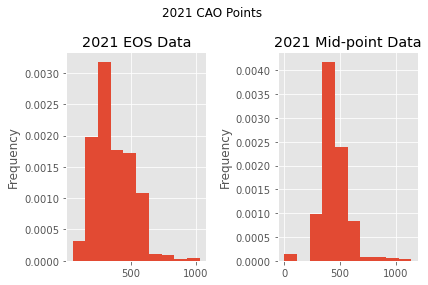

In [71]:
hist_points(df2021_data['EOS_2021'], "2021 EOS Data", df2021_data['MID_2021'], "2021 Mid-point Data", "2021 CAO Points")

In [72]:
df2020_data = df2020[['COURSE CODE2', 'R1 POINTS', 'R2 POINTS', 'EOS','EOS Mid-point']]
df2020_data.columns = ['code', 'r1_2020', 'r2_2020', 'EOS_2020', 'MID_2020']

# Set the index to the code column.
df2020_data.set_index('code', inplace=True)
df2020_data

,r1_2020,r2_2020,EOS_2020,MID_2020
code,,,,
AC120,209.0,NaN,209.0,280.0
AC137,252.0,NaN,252.0,270.0
AD101,NaN,NaN,NaN,NaN
AD102,NaN,NaN,NaN,NaN
AD103,NaN,NaN,NaN,NaN
...,...,...,...,...
WD208,188.0,NaN,188.0,339.0
WD210,279.0,NaN,279.0,337.0
WD211,271.0,NaN,271.0,318.0


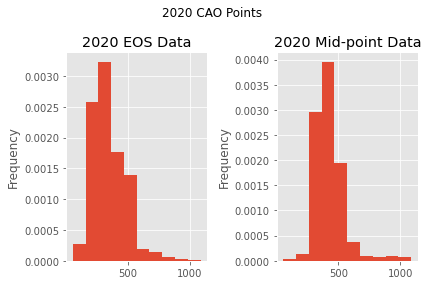

In [73]:
hist_points(df2020_data['EOS_2020'], "2020 EOS Data", df2020_data['MID_2020'], "2020 Mid-point Data", "2020 CAO Points")

In [74]:
df2019_data = df2019[['Course Code', 'EOS', 'Mid']]
df2019_data.columns = ['code', 'EOS_2019', 'MID_2019']

# Set the index to the code column.
df2019_data.set_index('code', inplace=True)
df2019_data

,EOS_2019,MID_2019
code,,
AL801,304.0,328.0
AL802,301.0,306.0
AL803,309.0,337.0
AL805,329.0,442.0
AL810,307.0,349.0
...,...,...
WD188,206.0,339.0
WD205,208.0,441.0
WD206,191.0,322.0


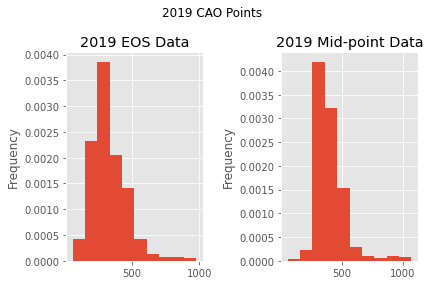

In [75]:
hist_points(df2019_data['EOS_2019'], "2019 EOS Data", df2019_data['MID_2019'], "2019 Mid-point Data", "2019 CAO Points")

In [76]:
# Join 2021 points to allcourses.
allcourses2 = allcourses.join(df2021_data)
allcourses2

# Join 2020 points to allcourses.
allcourses3 = allcourses2.join(df2020_data)
allcourses3

# Join 2019 points to allcourses.
allcourses_final = allcourses3.join(df2019_data)
allcourses_final

,title,hei,hei_code,category,r1_2021,r2_2021,EOS_2021,MID_2021,level,r1_2020,r2_2020,EOS_2020,MID_2020,EOS_2019,MID_2019
code,,,,,,,,,,,,,,,
AC120,International Business,American College,AC,Business and administration,294.0,294.0,294.0,352.0,8.0,209.0,NaN,209.0,280.0,234.0,269.0
AC137,Liberal Arts,American College,AC,Humanities (except languages),271.0,270.0,270.0,334.0,8.0,252.0,NaN,252.0,270.0,252.0,275.0
AD101,"First Year Art and Design (Common Entry,portfo...",National College of Art and Design,AD,Arts,554.0,NaN,554.0,604.0,8.0,NaN,NaN,NaN,NaN,NaN,550.0
AD102,Graphic Design and Moving Image Design (portfo...,National College of Art and Design,AD,Arts,538.0,NaN,538.0,625.0,8.0,NaN,NaN,NaN,NaN,NaN,635.0
AD103,Textile and Surface Design and Jewellery and O...,National College of Art and Design,AD,Arts,505.0,NaN,505.0,581.0,8.0,NaN,NaN,NaN,NaN,NaN,545.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WD231,Early Childhood Care and Education,Waterford Institute of Technology,WD,Welfare,266.0,NaN,266.0,366.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
WD232,Business Information Systems,Waterford Institute of Technology,WD,Business and administration,261.0,261.0,261.0,329.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
WD139,Civil Engineering,Waterford Institute of Technology,WD,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,206.0,379.0,200.0,364.0


In [77]:
allcourses_final = allcourses_final.reset_index()
allcourses_final

,code,title,hei,hei_code,category,r1_2021,r2_2021,EOS_2021,MID_2021,level,r1_2020,r2_2020,EOS_2020,MID_2020,EOS_2019,MID_2019
0,AC120,International Business,American College,AC,Business and administration,294.0,294.0,294.0,352.0,8.0,209.0,NaN,209.0,280.0,234.0,269.0
1,AC137,Liberal Arts,American College,AC,Humanities (except languages),271.0,270.0,270.0,334.0,8.0,252.0,NaN,252.0,270.0,252.0,275.0
2,AD101,"First Year Art and Design (Common Entry,portfo...",National College of Art and Design,AD,Arts,554.0,NaN,554.0,604.0,8.0,NaN,NaN,NaN,NaN,NaN,550.0
3,AD102,Graphic Design and Moving Image Design (portfo...,National College of Art and Design,AD,Arts,538.0,NaN,538.0,625.0,8.0,NaN,NaN,NaN,NaN,NaN,635.0
4,AD103,Textile and Surface Design and Jewellery and O...,National College of Art and Design,AD,Arts,505.0,NaN,505.0,581.0,8.0,NaN,NaN,NaN,NaN,NaN,545.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,WD231,Early Childhood Care and Education,Waterford Institute of Technology,WD,Welfare,266.0,NaN,266.0,366.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
1808,WD232,Business Information Systems,Waterford Institute of Technology,WD,Business and administration,261.0,261.0,261.0,329.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
1809,WD139,Civil Engineering,Waterford Institute of Technology,WD,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,206.0,379.0,200.0,364.0
1810,WD149,Early Childhood Studies,Waterford Institute of Technology,WD,NaN,NaN,NaN,NaN,NaN,NaN,271.0,NaN,271.0,368.0,288.0,336.0


For the purpose of this analysis I decided it would be best to compare EOS and mid-point data across the three years as there is no round 1 and round 2 data available for 2019. I will compare these two different data captures across the three years. I will create a dataframe with all these years of data below. 

In [78]:
CAO = allcourses_final[['code', 'title', 'hei', 'EOS_2021', 'MID_2021', 'EOS_2020', 'MID_2020', 'EOS_2019', 'MID_2019']]
CAO

,code,title,hei,EOS_2021,MID_2021,EOS_2020,MID_2020,EOS_2019,MID_2019
0,AC120,International Business,American College,294.0,352.0,209.0,280.0,234.0,269.0
1,AC137,Liberal Arts,American College,270.0,334.0,252.0,270.0,252.0,275.0
2,AD101,"First Year Art and Design (Common Entry,portfo...",National College of Art and Design,554.0,604.0,NaN,NaN,NaN,550.0
3,AD102,Graphic Design and Moving Image Design (portfo...,National College of Art and Design,538.0,625.0,NaN,NaN,NaN,635.0
4,AD103,Textile and Surface Design and Jewellery and O...,National College of Art and Design,505.0,581.0,NaN,NaN,NaN,545.0
...,...,...,...,...,...,...,...,...,...
1807,WD231,Early Childhood Care and Education,Waterford Institute of Technology,266.0,366.0,NaN,NaN,NaN,NaN
1808,WD232,Business Information Systems,Waterford Institute of Technology,261.0,329.0,NaN,NaN,NaN,NaN
1809,WD139,Civil Engineering,Waterford Institute of Technology,NaN,NaN,206.0,379.0,200.0,364.0
1810,WD149,Early Childhood Studies,Waterford Institute of Technology,NaN,NaN,271.0,368.0,288.0,336.0


I will remove any course from the data set where there are no values at all for the points across the three years as there is no need for them in dataset.

In [79]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html [10]
# https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan [11]
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas [12]
pd.options.mode.chained_assignment = None  # default='warn'
CAO.dropna(axis = 0, subset = ['EOS_2021', 'MID_2021', 'EOS_2020', 'MID_2020', 'EOS_2019', 'MID_2019'], how = 'all', inplace=True)
CAO

,code,title,hei,EOS_2021,MID_2021,EOS_2020,MID_2020,EOS_2019,MID_2019
0,AC120,International Business,American College,294.0,352.0,209.0,280.0,234.0,269.0
1,AC137,Liberal Arts,American College,270.0,334.0,252.0,270.0,252.0,275.0
2,AD101,"First Year Art and Design (Common Entry,portfo...",National College of Art and Design,554.0,604.0,NaN,NaN,NaN,550.0
3,AD102,Graphic Design and Moving Image Design (portfo...,National College of Art and Design,538.0,625.0,NaN,NaN,NaN,635.0
4,AD103,Textile and Surface Design and Jewellery and O...,National College of Art and Design,505.0,581.0,NaN,NaN,NaN,545.0
...,...,...,...,...,...,...,...,...,...
1807,WD231,Early Childhood Care and Education,Waterford Institute of Technology,266.0,366.0,NaN,NaN,NaN,NaN
1808,WD232,Business Information Systems,Waterford Institute of Technology,261.0,329.0,NaN,NaN,NaN,NaN
1809,WD139,Civil Engineering,Waterford Institute of Technology,NaN,NaN,206.0,379.0,200.0,364.0
1810,WD149,Early Childhood Studies,Waterford Institute of Technology,NaN,NaN,271.0,368.0,288.0,336.0


In [80]:
CAO.dtypes 

code         object
title        object
hei          object
EOS_2021    float64
MID_2021    float64
EOS_2020    float64
MID_2020    float64
EOS_2019    float64
MID_2019    float64
dtype: object

In [81]:
CAO.describe()

,EOS_2021,MID_2021,EOS_2020,MID_2020,EOS_2019,MID_2019
count,1399.000000,1431.000000,1411.000000,1422.000000,1340.000000,1368.000000
mean,367.872051,445.616352,346.727144,426.483122,326.646269,399.729532
std,144.883338,126.512445,136.428367,120.004120,131.604468,123.622179
min,57.000000,0.000000,55.000000,57.000000,55.000000,57.000000
25%,261.000000,368.000000,251.000000,351.000000,236.750000,322.000000
50%,331.000000,429.000000,311.000000,399.000000,300.000000,369.000000
75%,473.500000,520.000000,424.500000,478.750000,400.000000,446.000000
max,1028.000000,1141.000000,1088.000000,1088.000000,979.000000,1073.000000


## 3.3 Analysis of all places offered over the three years.
I will give a brief analysis below of all courses points over the three years regardless if they were offered over the three years or not. This give give an insight into the points of the students that were offered places on courses over the three years individually.

In [82]:
CAO.describe()

,EOS_2021,MID_2021,EOS_2020,MID_2020,EOS_2019,MID_2019
count,1399.000000,1431.000000,1411.000000,1422.000000,1340.000000,1368.000000
mean,367.872051,445.616352,346.727144,426.483122,326.646269,399.729532
std,144.883338,126.512445,136.428367,120.004120,131.604468,123.622179
min,57.000000,0.000000,55.000000,57.000000,55.000000,57.000000
25%,261.000000,368.000000,251.000000,351.000000,236.750000,322.000000
50%,331.000000,429.000000,311.000000,399.000000,300.000000,369.000000
75%,473.500000,520.000000,424.500000,478.750000,400.000000,446.000000
max,1028.000000,1141.000000,1088.000000,1088.000000,979.000000,1073.000000


At a glance form the descriptive statistics across both EOS and mid-point CAO points across the three years, it can bee seen that there has been an increase year on year from 2019 to 2020 to 2021. 

In the end of season points there was an increase of 6.1% from 2019 to 2020 and a further 6.1% from 2020 to 2021 in the number of points needed to obtain a place in a HEI in Ireland each year. 

In relation to the points received by the stduwents the median points of students who were offered a place on each course increase by 6.7% from 2019 to 2020 and a further 4.5% from 2020 to 2021. This again has shown a higher level of points achieved by students year on year.

# 4. Main Analysis
In this section I will carry out the main analysis of the CAO points in 2019, 2020 and 2021. For the purpose of this analysis I will analyze trends in courses that were offered every year. Therefore only courses that were offered in 2019, 2020 and 2021 will be compared. This will provide a good insight into how the points changed across each individual year. Below I will manipulate this dataframe in order to just get a dataframe with courses offered each year.

In section 4.1 I will give a quick insight into how the median points for each course has changed over the three years and then in section 4.2 i will give a detailed analyis of how teh end of season points have comapred across the three years which will enable us to see what it took to get a place on each course over the three years in each case. I will look at the different level courses and also teh difference between each years end of season points. 

In [83]:

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html
CAO_all3_1 = allcourses.join(df2021_data, how = 'inner')
CAO_all3_2 = CAO_all3_1.join(df2020_data, how = 'inner')
CAO_all3 = CAO_all3_2.join(df2019_data, how = 'inner')

CAO_all3 = CAO_all3.reset_index()

CAO_3 = CAO_all3[['code', 'category', 'title', 'hei', 'EOS_2021', 'MID_2021', 'EOS_2020', 'MID_2020', 'EOS_2019', 'MID_2019', 'level']]
CAO_3

,code,category,title,hei,EOS_2021,MID_2021,EOS_2020,MID_2020,EOS_2019,MID_2019,level
0,AC120,Business and administration,International Business,American College,294.0,352.0,209.0,280.0,234.0,269.0,8
1,AC137,Humanities (except languages),Liberal Arts,American College,270.0,334.0,252.0,270.0,252.0,275.0,8
2,AD101,Arts,"First Year Art and Design (Common Entry,portfo...",National College of Art and Design,554.0,604.0,NaN,NaN,NaN,550.0,8
3,AD102,Arts,Graphic Design and Moving Image Design (portfo...,National College of Art and Design,538.0,625.0,NaN,NaN,NaN,635.0,8
4,AD103,Arts,Textile and Surface Design and Jewellery and O...,National College of Art and Design,505.0,581.0,NaN,NaN,NaN,545.0,8
...,...,...,...,...,...,...,...,...,...,...,...
1066,WD208,Engineering and engineering trades,Manufacturing Engineering,Waterford Institute of Technology,317.0,368.0,188.0,339.0,195.0,330.0,7
1067,WD210,Information and Communication Technologies (ICTs),Software Systems Development,Waterford Institute of Technology,260.0,373.0,279.0,337.0,271.0,329.0,8
1068,WD211,Information and Communication Technologies (ICTs),Creative Computing,Waterford Institute of Technology,270.0,392.0,271.0,318.0,275.0,322.0,8
1069,WD212,Personal services,Recreation and Sport Management,Waterford Institute of Technology,262.0,304.0,270.0,349.0,274.0,311.0,8


In [84]:
CAO_3.dropna(axis = 0, subset = ['EOS_2021', 'MID_2021', 'EOS_2020', 'MID_2020', 'EOS_2019', 'MID_2019'], how = 'any', inplace=True)

In [85]:
CAO_3

,code,category,title,hei,EOS_2021,MID_2021,EOS_2020,MID_2020,EOS_2019,MID_2019,level
0,AC120,Business and administration,International Business,American College,294.0,352.0,209.0,280.0,234.0,269.0,8
1,AC137,Humanities (except languages),Liberal Arts,American College,270.0,334.0,252.0,270.0,252.0,275.0,8
9,AD215,Arts,Visual Culture,National College of Art and Design,300.0,380.0,320.0,389.0,300.0,338.0,8
12,AL630,Health,Pharmacy Technician,Athlone Institute of Technology,308.0,409.0,295.0,379.0,306.0,366.0,6
13,AL631,Health,Dental Nursing,Athlone Institute of Technology,311.0,400.0,298.0,388.0,326.0,379.0,6
...,...,...,...,...,...,...,...,...,...,...,...
1066,WD208,Engineering and engineering trades,Manufacturing Engineering,Waterford Institute of Technology,317.0,368.0,188.0,339.0,195.0,330.0,7
1067,WD210,Information and Communication Technologies (ICTs),Software Systems Development,Waterford Institute of Technology,260.0,373.0,279.0,337.0,271.0,329.0,8
1068,WD211,Information and Communication Technologies (ICTs),Creative Computing,Waterford Institute of Technology,270.0,392.0,271.0,318.0,275.0,322.0,8
1069,WD212,Personal services,Recreation and Sport Management,Waterford Institute of Technology,262.0,304.0,270.0,349.0,274.0,311.0,8


In [86]:
# Count of null values in columns as sanity check
EOS_2021_null = CAO_3['EOS_2021'].isnull().sum(axis = 0)
EOS_2020_null = CAO_3['EOS_2020'].isnull().sum(axis = 0)
EOS_2019_null = CAO_3['EOS_2019'].isnull().sum(axis = 0)
MID_2021_null = CAO_3['MID_2021'].isnull().sum(axis = 0)
MID_2020_null = CAO_3['MID_2020'].isnull().sum(axis = 0)
MID_2019_null = CAO_3['MID_2019'].isnull().sum(axis = 0)
level_null = CAO_3['level'].isnull().sum(axis = 0)

print(EOS_2021_null, EOS_2020_null, EOS_2020_null, MID_2021_null, MID_2020_null, MID_2019_null, level_null)

0 0 0 0 0 0 0


Therefore the above has been validated and can be used in order to ensure no column contains a null value for making a comparison year on year. 

In [87]:
CAO_3['19_20_Diff'] = CAO_3['EOS_2020'] - CAO_3['EOS_2019']
CAO_3['20_21_Diff'] = CAO_3['EOS_2021'] - CAO_3['EOS_2020']
CAO_3['19_21_Diff'] = CAO_3['EOS_2021'] - CAO_3['EOS_2019']

In [88]:
CAO_3['19_20_Diff_M'] = CAO_3['MID_2020'] - CAO_3['MID_2019']
CAO_3['20_21_Diff_M'] = CAO_3['MID_2021'] - CAO_3['MID_2020']

In [89]:
CAO_3

,code,category,title,hei,EOS_2021,MID_2021,EOS_2020,MID_2020,EOS_2019,MID_2019,level,19_20_Diff,20_21_Diff,19_21_Diff,19_20_Diff_M,20_21_Diff_M
0,AC120,Business and administration,International Business,American College,294.0,352.0,209.0,280.0,234.0,269.0,8,-25.0,85.0,60.0,11.0,72.0
1,AC137,Humanities (except languages),Liberal Arts,American College,270.0,334.0,252.0,270.0,252.0,275.0,8,0.0,18.0,18.0,-5.0,64.0
9,AD215,Arts,Visual Culture,National College of Art and Design,300.0,380.0,320.0,389.0,300.0,338.0,8,20.0,-20.0,0.0,51.0,-9.0
12,AL630,Health,Pharmacy Technician,Athlone Institute of Technology,308.0,409.0,295.0,379.0,306.0,366.0,6,-11.0,13.0,2.0,13.0,30.0
13,AL631,Health,Dental Nursing,Athlone Institute of Technology,311.0,400.0,298.0,388.0,326.0,379.0,6,-28.0,13.0,-15.0,9.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,WD208,Engineering and engineering trades,Manufacturing Engineering,Waterford Institute of Technology,317.0,368.0,188.0,339.0,195.0,330.0,7,-7.0,129.0,122.0,9.0,29.0
1067,WD210,Information and Communication Technologies (ICTs),Software Systems Development,Waterford Institute of Technology,260.0,373.0,279.0,337.0,271.0,329.0,8,8.0,-19.0,-11.0,8.0,36.0
1068,WD211,Information and Communication Technologies (ICTs),Creative Computing,Waterford Institute of Technology,270.0,392.0,271.0,318.0,275.0,322.0,8,-4.0,-1.0,-5.0,-4.0,74.0
1069,WD212,Personal services,Recreation and Sport Management,Waterford Institute of Technology,262.0,304.0,270.0,349.0,274.0,311.0,8,-4.0,-8.0,-12.0,38.0,-45.0


The above dataframe is the dataframe that will be utilized for the main analysis of this project.

In [90]:
# gathering all the EOS data into one dataframe
EOS_data = CAO_3[['code', 'title', 'hei', 'EOS_2019', 'EOS_2020', 'EOS_2021']]

# gathering all the mid-point data into one dataframe
MID_data = CAO_3[['code', 'title', 'hei', 'MID_2019', 'MID_2020', 'MID_2021']]

## 4.1 Mid-point (median) CAO Points
Below I will detail the comparison of the mid-point (median) points received across each year, this will give an insight into how the middle students results getting accepted into each course in each year has changed across the three years.

In [91]:
MID_data.describe()

,MID_2019,MID_2020,MID_2021
count,997.000000,997.000000,997.000000
mean,404.739218,426.527583,448.614845
std,111.226280,113.171186,112.628820
min,57.000000,57.000000,59.000000
25%,332.000000,356.000000,371.000000
50%,378.000000,401.000000,424.000000
75%,457.000000,479.000000,509.000000
max,1055.000000,1088.000000,1141.000000


The descriptive statistics show that year on year since 2019 the mid-point CAO points have increased gradually in mean , standard deviation and interquartile range. The boxplot shows this below graphed, in order to visualize this increase. 

The median points received by students who were given a place in a course on the CAO increased by 5.4% (21.8 points) from 2019 to 2020 and increased by a furtehr 5.2% (22.1 points) from 2020 to 2021.

Text(0.5, 1.0, 'Mid-points 2021')

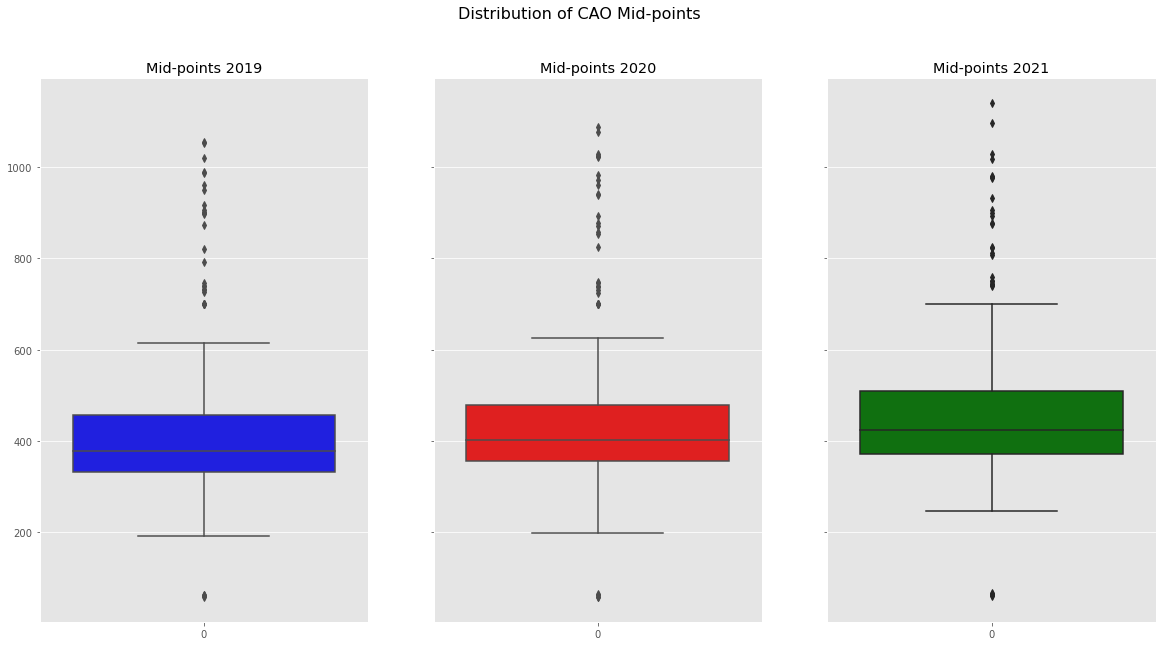

In [92]:
# https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8 [13]
fig, axes = plt.subplots(1, 3, figsize=(20, 10), sharey=True)
fig.suptitle('Distribution of CAO Mid-points', size = 16, weight= 16)

sns.boxplot(ax=axes[0], data = MID_data['MID_2019'], color='blue')
axes[0].set_title('Mid-points 2019')

sns.boxplot(ax=axes[1], data = MID_data['MID_2020'], color='red')
axes[1].set_title('Mid-points 2020')

sns.boxplot(ax=axes[2], data = MID_data['MID_2021'], color='green')
axes[2].set_title('Mid-points 2021')

The boxplot displays how the mean has increase year on year with an increase, this can be seen by the shift (upwards) of the boxplot each year.

Text(0.5, 1.0, 'Mid-points 2021')

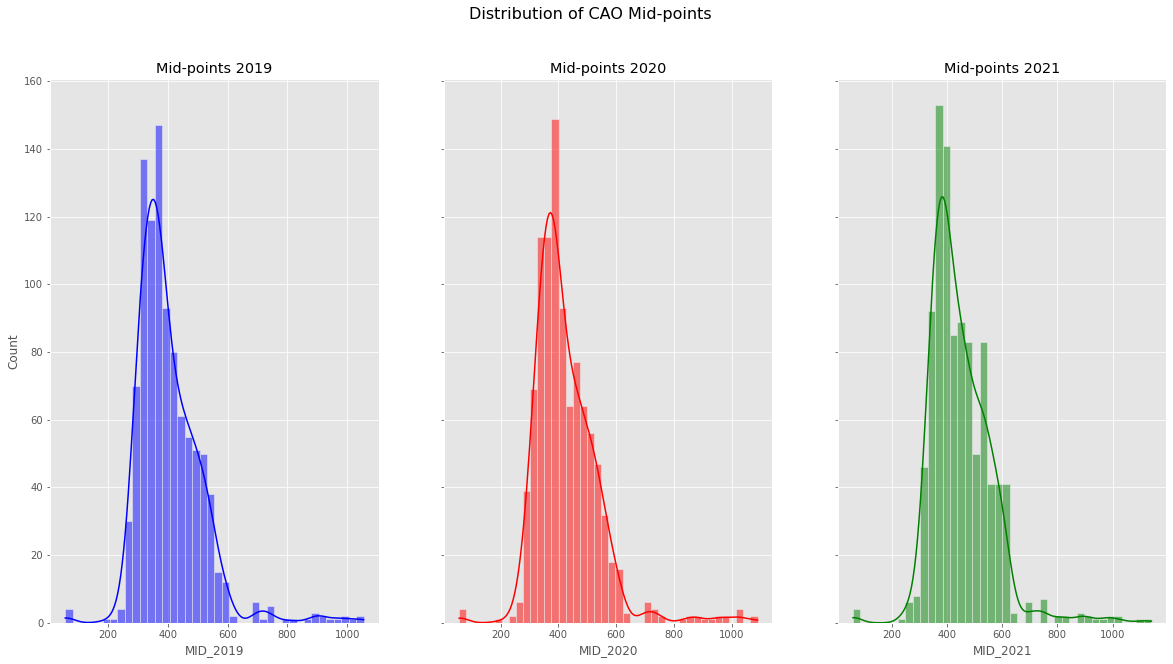

In [93]:
plt.style.use('ggplot')

# https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8 [13]
fig, axes = plt.subplots(1, 3, figsize=(20, 10), sharey=True)
fig.suptitle('Distribution of CAO Mid-points', size = 16, weight= 16)


sns.histplot(ax=axes[0], data = MID_data['MID_2019'], color='blue', kde=True)
axes[0].set_title('Mid-points 2019')


sns.histplot(ax=axes[1], data = MID_data['MID_2020'], color='red', kde=True)
axes[1].set_title('Mid-points 2020')


sns.histplot(ax=axes[2], data = MID_data['MID_2021'], color='green', kde=True)
axes[2].set_title('Mid-points 2021')

The above histograms show how the CAO mid-point distribution has shifted slightly to the right each year indicating an increase in the mean mid-points received in CAO points for each year. The data shows a similar distribtuion but you can see that in 2021 teh points to get into a CAo course are higher and there is more of a positive skew seen in the graph.

<AxesSubplot:title={'center':'KDE Plots of Mid-point CAO Points'}, ylabel='Density'>

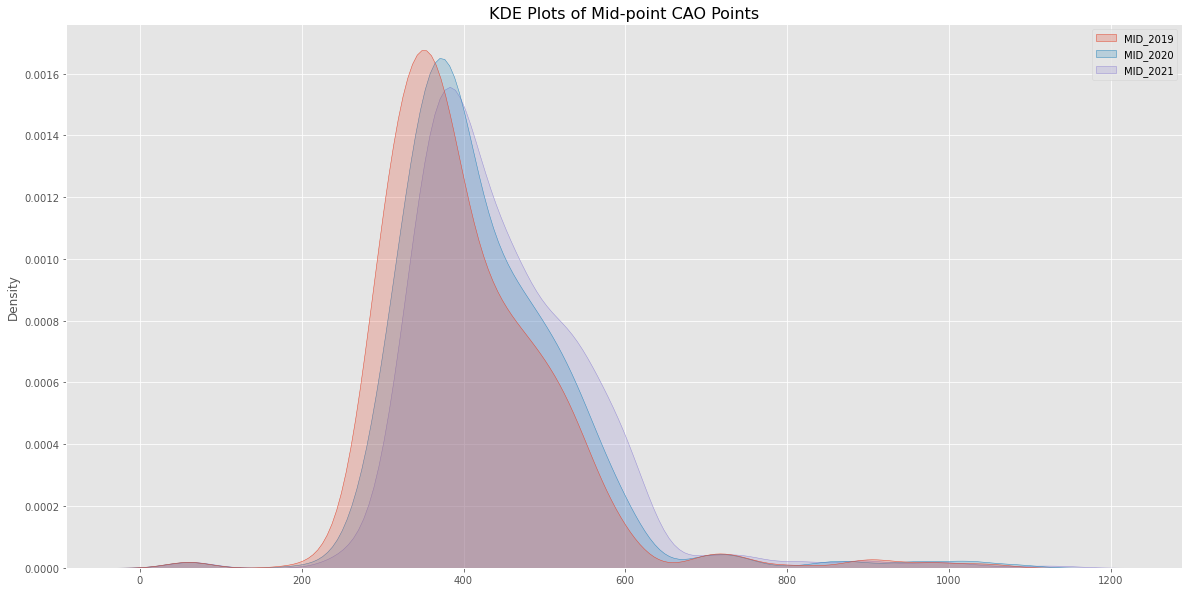

In [94]:
plt.figure(figsize=(20,10))
plt.title("KDE Plots of Mid-point CAO Points", size = 16, weight= 16)
sns.kdeplot(data=MID_data, shade = True)

The KDE plot shows that there is obvious shift (increase) in the mean CAO mid-points, we can also see there is also a higher number of students obtaining a higher number of points as year after year there seems to be a slight increase in the positive skewness of the graphs.

## 4.2 End of Season CAO Points
Below I will detail the comparison of the end of season points achieved for each course across each year. This will show the minimum points required to be rewarded with a place in a Higher Education Institute course across the three years.

In [95]:
EOS_data.describe()

,EOS_2019,EOS_2020,EOS_2021
count,997.000000,997.000000,997.000000
mean,335.699097,348.036108,361.722166
std,124.933499,132.005053,140.788279
min,55.000000,55.000000,57.000000
25%,251.000000,254.000000,261.000000
50%,307.000000,311.000000,321.000000
75%,409.000000,430.000000,462.000000
max,972.000000,1088.000000,1028.000000


The descriptive statistics show that year on year since 2019 the end of season CAO points have increased gradually in mean, standard deviation and interquartile range. 

The above shows from 2019 to 2020 the mean minimum points needed to get offered a place on a course increased by 3.7% (12.3 points) and from 2020 to 2021 these points increased by a further 3.9% (13.7 points). 

I will generate boxplots, histograms and then KDE plots in order to give a more detailed visualization into the distributions of these points each year.

Text(0.5, 1.0, 'EOS 2021')

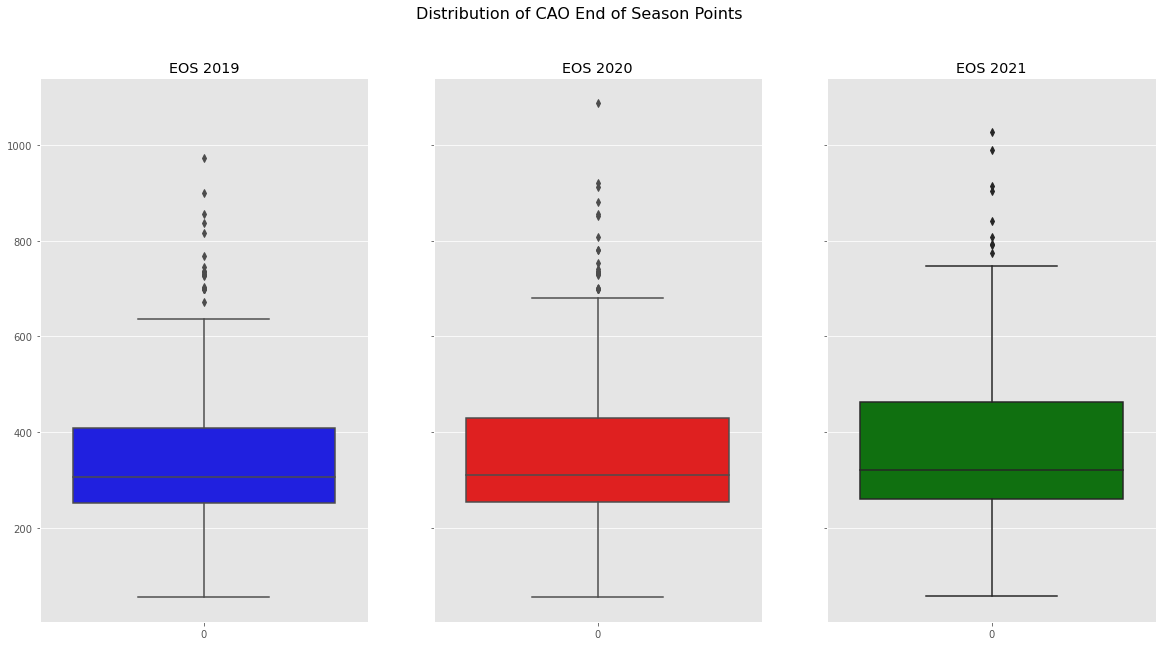

In [96]:
# https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
fig, axes = plt.subplots(1, 3, figsize=(20, 10), sharey=True)
fig.suptitle('Distribution of CAO End of Season Points', size = 16, weight= 16)

sns.boxplot(ax=axes[0], data = EOS_data['EOS_2019'], color='blue')
axes[0].set_title('EOS 2019')

sns.boxplot(ax=axes[1], data = EOS_data['EOS_2020'], color='red')
axes[1].set_title('EOS 2020')

sns.boxplot(ax=axes[2], data = EOS_data['EOS_2021'], color='green')
axes[2].set_title('EOS 2021')

Text(0.5, 1.0, 'EOS 2021')

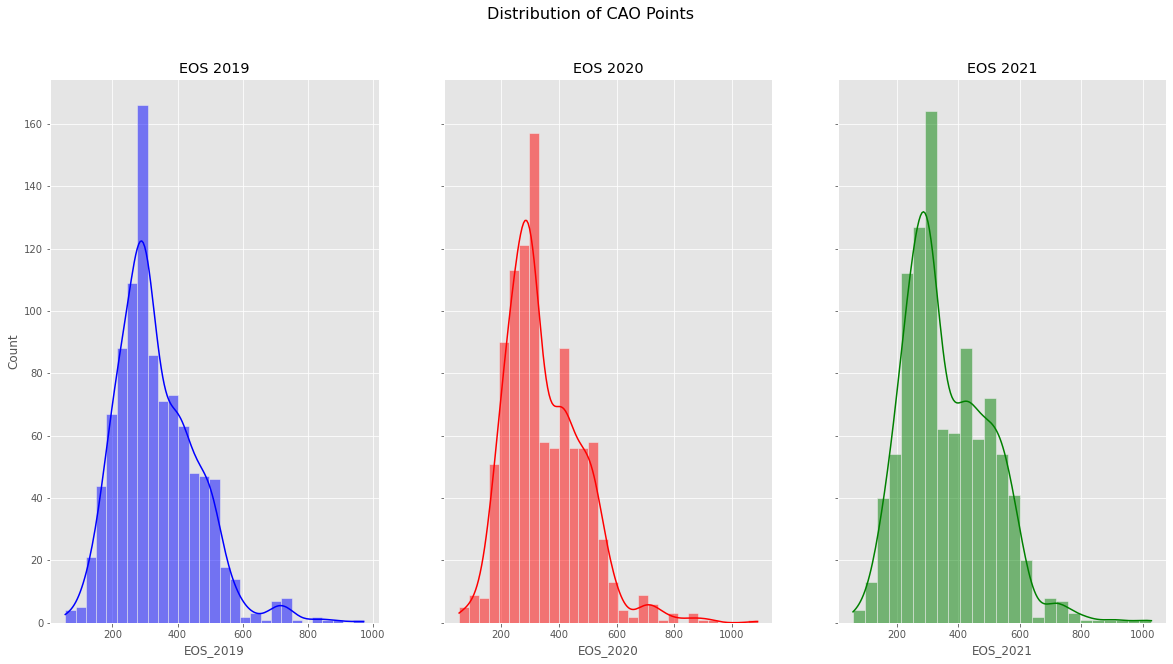

In [97]:
plt.style.use('ggplot')

# https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8 [13]
fig, axes = plt.subplots(1, 3, figsize=(20, 10), sharey=True)
fig.suptitle('Distribution of CAO Points', size = 16, weight= 16)


sns.histplot(ax=axes[0], data = EOS_data['EOS_2019'], color='blue', kde=True)
axes[0].set_title('EOS 2019')


sns.histplot(ax=axes[1], data = EOS_data['EOS_2020'], color='red', kde=True)
axes[1].set_title('EOS 2020')


sns.histplot(ax=axes[2], data = EOS_data['EOS_2021'], color='green', kde=True)
axes[2].set_title('EOS 2021')

<AxesSubplot:title={'center':'KDE Plots of Course Minimum CAO Points'}, ylabel='Density'>

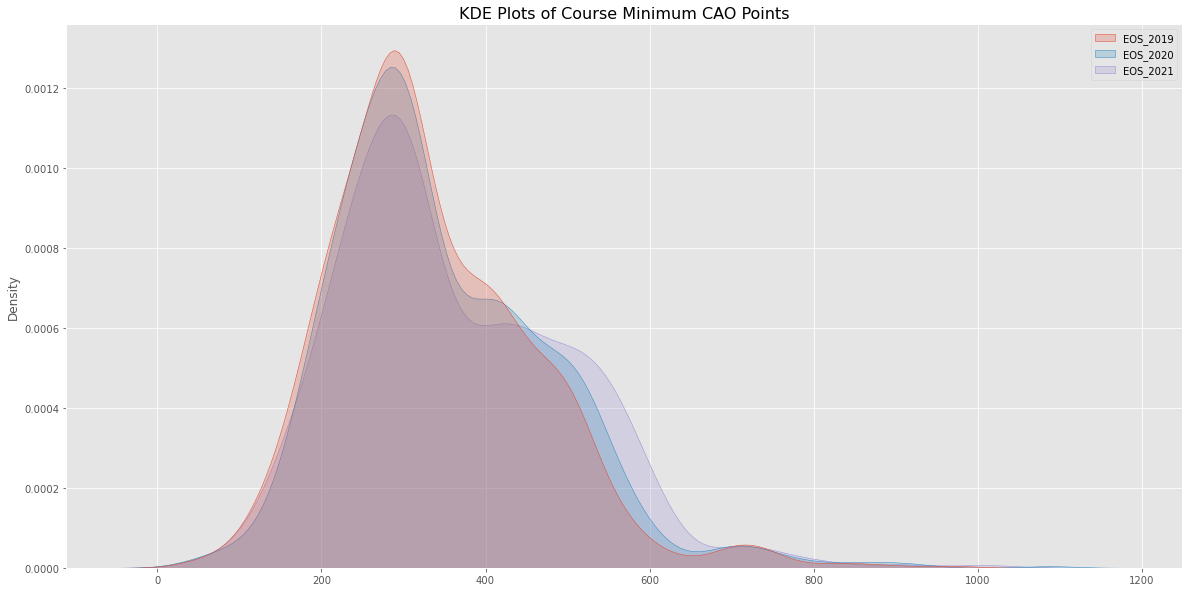

In [98]:
plt.figure(figsize=(20,10))
plt.title("KDE Plots of Course Minimum CAO Points", size = 16, weight= 16)
sns.kdeplot(data=EOS_data, shade = True)

The above plot all show how the distribution of points across each year has increased, the mean minimum points required to get accepted into a course has increased and there is clearly a higher number of courses where the minimum number of points is 600 points. Showing that the points being awarded to students in each case increasing. From the KDE plot above you can see that there is a greater number of courses where the minimum requirement is over 400 points and under 650 as above. 

## 4.3 End of Season CAO Points by Course Level

In [99]:
# gathering all the EOS data into one dataframe with level
EOS_data_2 = CAO_3[['code', 'title', 'hei', 'level', 'EOS_2019', 'EOS_2020', 'EOS_2021']]

# create df for each level
level8 = EOS_data_2[EOS_data_2["level"] == 8]
level8 = level8[['code', 'title', 'hei', 'EOS_2019', 'EOS_2020', 'EOS_2021']]

level7 = EOS_data_2[EOS_data_2["level"] == 7]
level7 = level7[['code', 'title', 'hei', 'EOS_2019', 'EOS_2020', 'EOS_2021']]

level6 = EOS_data_2[EOS_data_2["level"] == 6]
level6 = level6[['code', 'title', 'hei', 'EOS_2019', 'EOS_2020', 'EOS_2021']]

### Level 8 Courses 

In [100]:
level8.describe()

,EOS_2019,EOS_2020,EOS_2021
count,714.000000,714.000000,714.000000
mean,376.551821,389.403361,406.051821
std,113.951803,122.338916,130.175311
min,55.000000,55.000000,57.000000
25%,299.000000,300.000000,302.000000
50%,354.000000,376.000000,397.000000
75%,443.000000,467.500000,499.750000
max,972.000000,1088.000000,1028.000000


The descriptive statistics for level 8 courses show that year on year since 2019 the end of season CAO points have increased gradually in mean, standard deviation and interquartile range. 

The above shows from 2019 to 2020 the mean minimum points needed to get offered a place on a level 8 course increased by 3.4% (12.9 points) and from 2020 to 2021 these points increased by a further 4.3% (14.6 points). 

This can be seen in the boxplot below. 

<AxesSubplot:title={'center':'Boxplots of EOS CAO Points for Level 8 Courses'}>

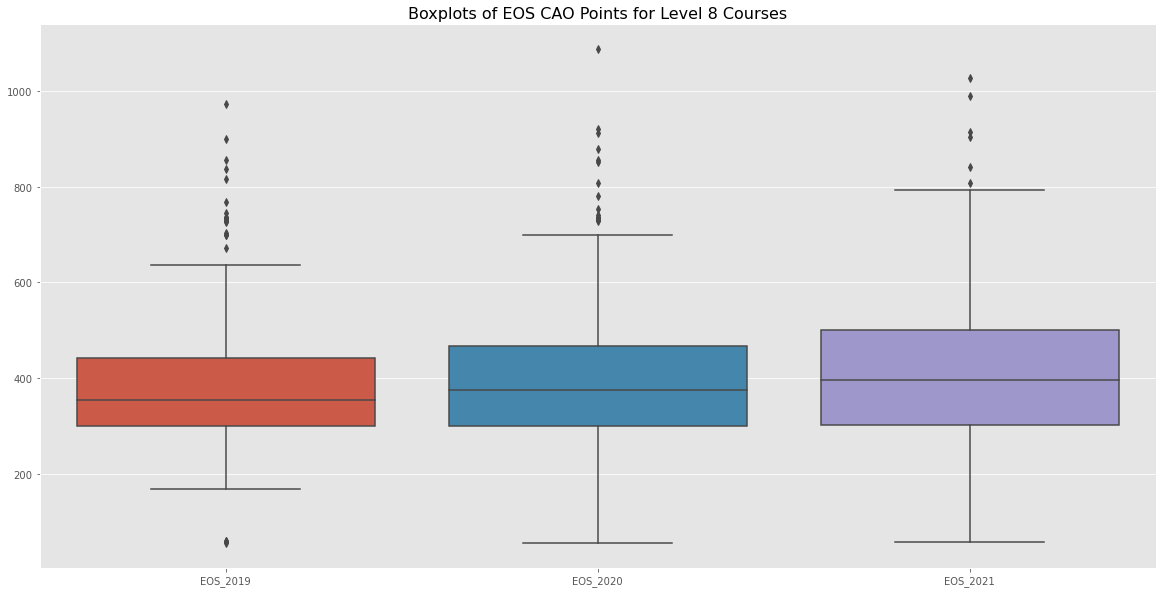

In [101]:
plt.figure(figsize=(20,10))
plt.title("Boxplots of EOS CAO Points for Level 8 Courses", size = 16, weight= 16)
sns.boxplot(data=level8)

### Level 7 Courses 

In [102]:
level7.describe()

,EOS_2019,EOS_2020,EOS_2021
count,234.000000,234.000000,234.000000
mean,235.418803,247.358974,254.098291
std,88.960399,96.898909,100.006067
min,101.000000,80.000000,100.000000
25%,186.250000,196.500000,200.250000
50%,224.500000,235.000000,238.000000
75%,264.500000,277.000000,291.500000
max,700.000000,781.000000,775.000000


The descriptive statistics for level 7 courses show that year on year since 2019 the end of season CAO points have increased gradually in mean, standard deviation and interquartile range. 

The above shows from 2019 to 2020 the mean minimum points needed to get offered a place on a level 7 course increased by 5.1% (12 points) and from 2020 to 2021 these points increased by a further 2.7% (6.7 points). 

This can be seen in the boxplot below. 

<AxesSubplot:title={'center':'Boxplots of EOS CAO Points for Level 7 Courses'}>

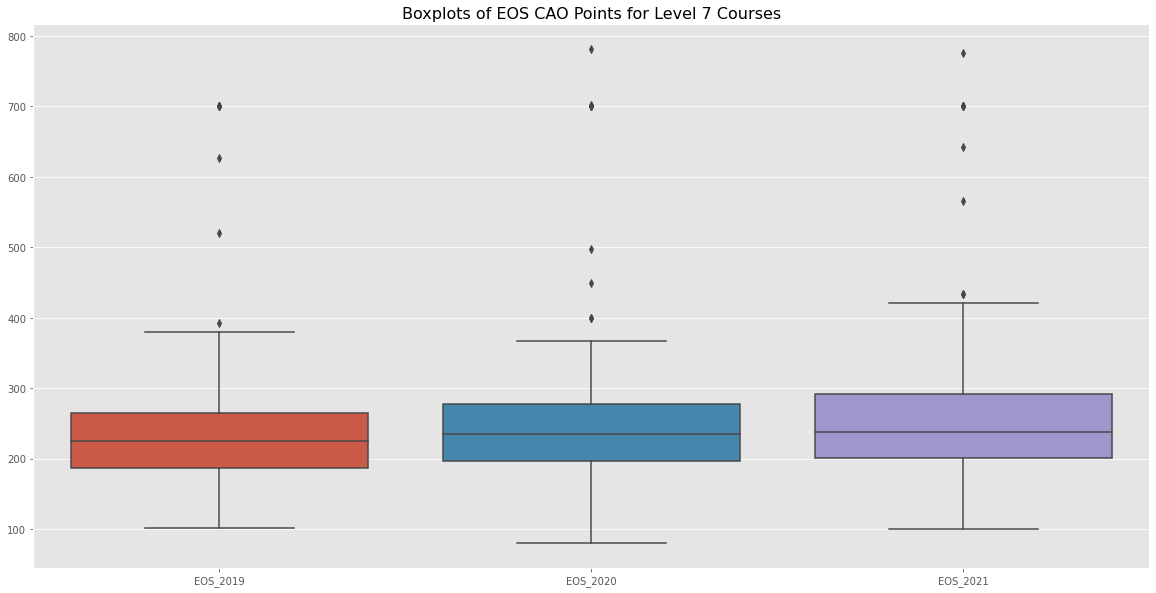

In [103]:
plt.figure(figsize=(20,10))
plt.title("Boxplots of EOS CAO Points for Level 7 Courses", size = 16, weight= 16)
sns.boxplot(data=level7)

### Level 6 Courses 

In [104]:
level6.describe()

,EOS_2019,EOS_2020,EOS_2021
count,49.000000,49.000000,49.000000
mean,219.306122,226.040816,229.734694
std,69.984881,60.152223,86.895957
min,116.000000,148.000000,113.000000
25%,173.000000,181.000000,171.000000
50%,206.000000,210.000000,214.000000
75%,245.000000,251.000000,259.000000
max,454.000000,451.000000,463.000000


The descriptive statistics for level 6 courses show that year on year since 2019 the end of season CAO points have increased gradually in mean, standard deviation and interquartile range. 

The above shows from 2019 to 2020 the mean minimum points needed to get offered a place on a level 6 course increased by 3.1% (6.7 points) and from 2020 to 2021 these points increased by a further 1.6% (3.7 points). 

This can be seen in the boxplot below. 

<AxesSubplot:title={'center':'Boxplots of EOS CAO Points for Level 6 Courses'}>

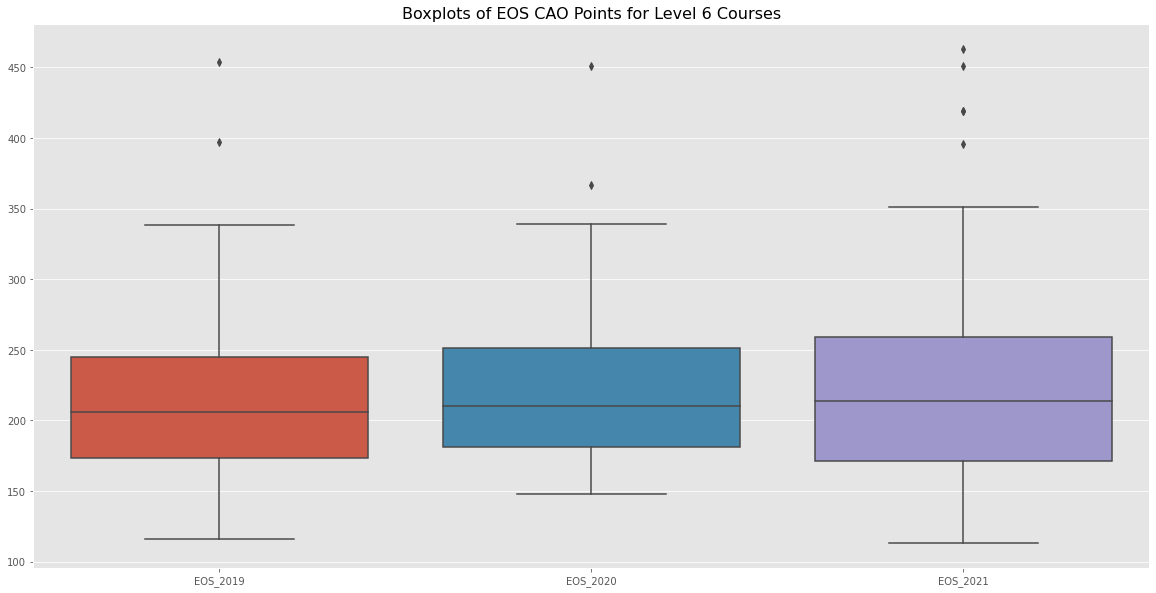

In [105]:
plt.figure(figsize=(20,10))
plt.title("Boxplots of EOS CAO Points for Level 6 Courses", size = 16, weight= 16)
sns.boxplot(data=level6)

Level 6 CAO points saw an increase in points across each year incrementally which can be seen by the above boxplots and descriptive statistics. 

Text(0.5, 1.0, 'Level 6 EOS CAO Points')

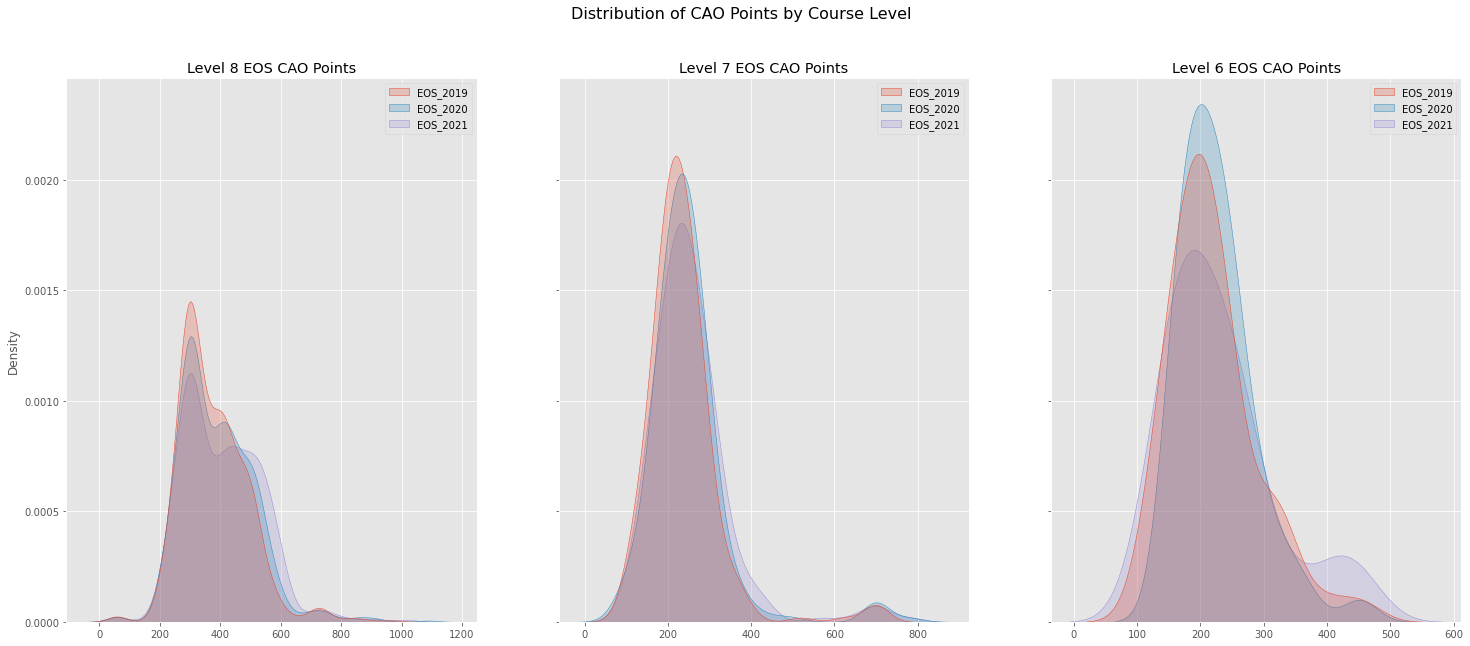

In [106]:
fig, axes = plt.subplots(1, 3, figsize=(25, 10), sharey=True)
fig.suptitle('Distribution of CAO Points by Course Level', size = 16, weight= 16)


sns.kdeplot(ax=axes[0], data=level8, shade = True)
axes[0].set_title('Level 8 EOS CAO Points')


sns.kdeplot(ax=axes[1], data=level7, shade = True)
axes[1].set_title('Level 7 EOS CAO Points')


sns.kdeplot(ax=axes[2], data=level6, shade = True)
axes[2].set_title('Level 6 EOS CAO Points')

## 4.3 Differences in End of Season CAO Points by Year

In [107]:
# create a df with differnce columns
Diff = CAO_3[['code', 'title', 'hei', 'category', '19_20_Diff', '20_21_Diff', '19_21_Diff']]

<AxesSubplot:title={'center':'Barplot of Difference in Points from 2019 to 2020'}, xlabel='19_20_Diff', ylabel='category'>

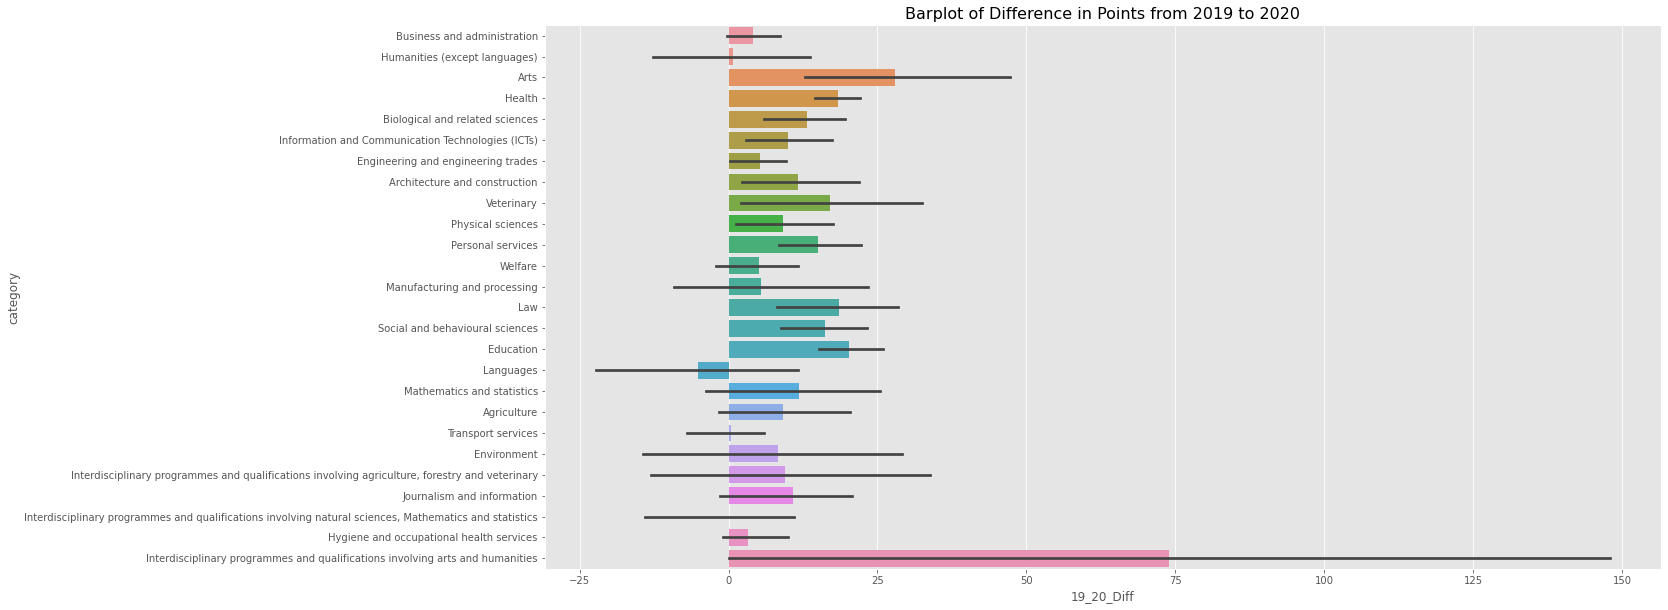

In [108]:
# barplot 
plt.figure(figsize=(20,10))
plt.title("Barplot of Difference in Points from 2019 to 2020", size = 16, weight= 16)
sns.barplot(x=Diff["19_20_Diff"], y=Diff["category"])

In [109]:
Diff["19_20_Diff"].mean()

12.337011033099298

<AxesSubplot:title={'center':'Barplot of Difference in Points from 2020 to 2021'}, xlabel='20_21_Diff', ylabel='category'>

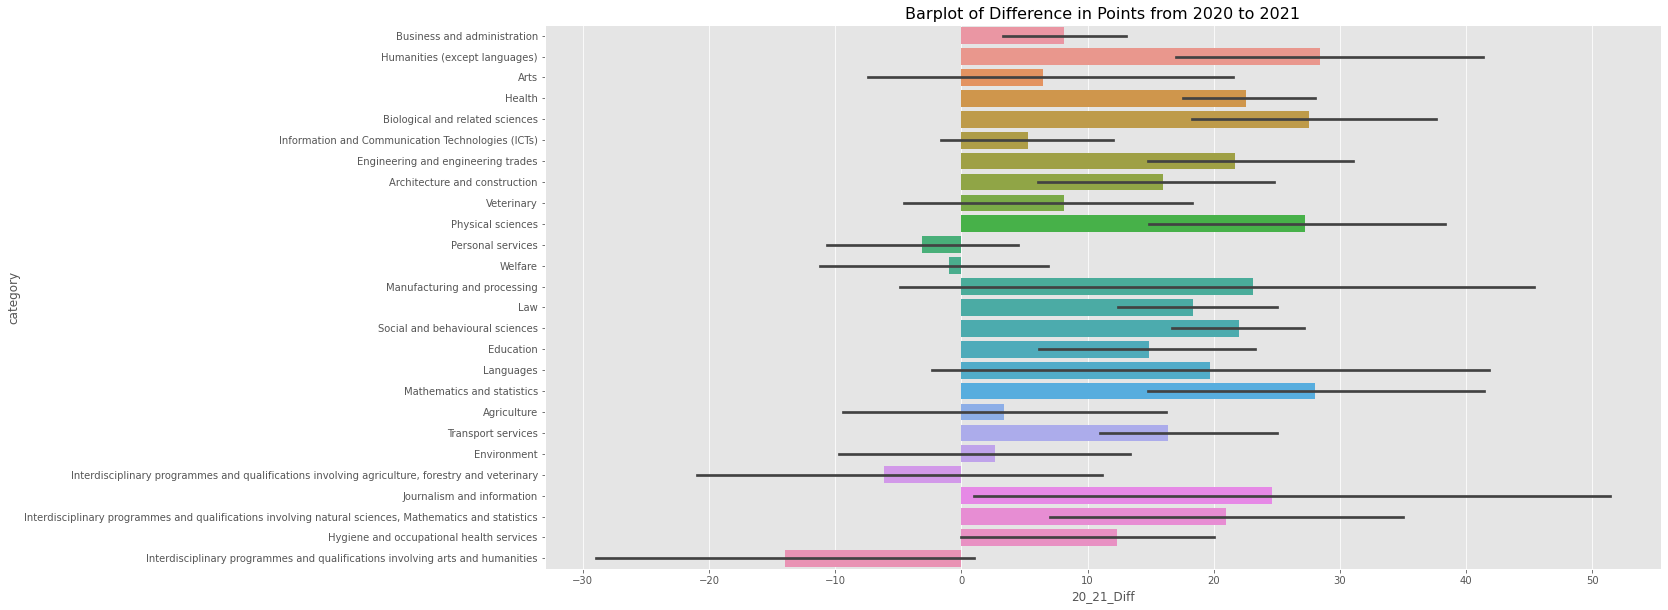

In [110]:
plt.figure(figsize=(20,10))
plt.title("Barplot of Difference in Points from 2020 to 2021", size = 16, weight= 16)
sns.barplot(x=Diff["20_21_Diff"], y=Diff["category"])

In [111]:
Diff["20_21_Diff"].mean()

13.68605817452357

<AxesSubplot:title={'center':'Barplot of Difference in Points from 2019 to 2021'}, xlabel='19_21_Diff', ylabel='category'>

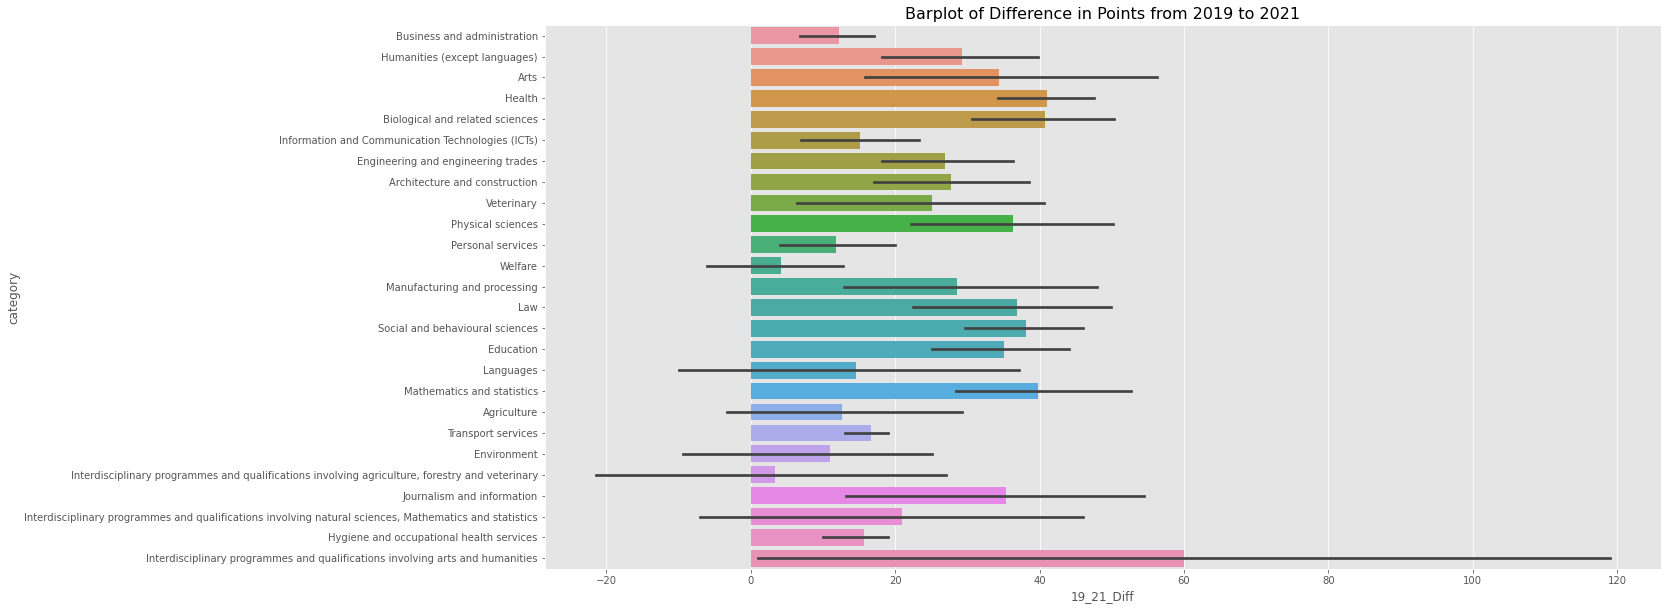

In [112]:
plt.figure(figsize=(20,10))
# barplot 
plt.title("Barplot of Difference in Points from 2019 to 2021", size = 16, weight= 16)
sns.barplot(x=Diff["19_21_Diff"], y=Diff["category"])

In [113]:
Diff["19_21_Diff"].mean()

26.023069207622868

In [114]:
Diff['category'].value_counts()

Business and administration                                                                               137
Health                                                                                                    118
Information and Communication Technologies (ICTs)                                                         101
Arts                                                                                                       92
Engineering and engineering trades                                                                         89
Architecture and construction                                                                              65
Personal services                                                                                          58
Biological and related sciences                                                                            51
Social and behavioural sciences                                                                            42
Education 

The above analysis and graphs visualize the changes in CAO end of season points each year, there was a mean increase of 12.3 points per course from 2019 to 2020 and a mean increase of 13.7. This is a mean difference of 26 points per course from 2019 to 2021. It can be noted that on average every single area of study has increased from 2019 to 2021. The course categories of Interdisciplinary programmes and qualifications involving arts and humanities, Mathematics and statistics, Biological and related sciences and Health saw the greatest increase in points needed to be accepted into a course from the CAO. 

# 5. Conclusion
To conclude on the above analysis it is evident in the graphs and statistics provided on the CAO points in the years 2019, 2020 and 2021 that there was an increase in the points needed in order to be offered a place in a Higher Education Institute in Ireland over the course of these years.

It can be seen that there was an incremental increase each year both from 2019 to 2020 (3.7%) and from 2020 to 2021 (3.9%) in the minimum points needed to be offered a place on the CAO. There was a greater increase in the number of points needed to be offered a place in level 8 courses (7.7%) and in level 7 courses (7.8%) from 2019 to 2021 which is a huge number, tehre was not as significant an increase in points in relation to level 6 courses (4.7%), but this figure is still a significant increase nonetheless. 

Level 7 course saw a great increase of 5.1% in 2020 from 2019 compared to 2.7% in 2020 to 2021. The opposite is true for level 8 courses as there was an increase of 4.3% in 2020 to 2021 compared to 3.4% in 2019 to 2020. The distributions of teh data across each year has shown an increase in mean and standard deviation across level 6, level 7 and level 8 course. 

There was a mean increase of 12.3 points from 2019 to 2020 across all course and then a further increase of 13.7 across all courses from 2020 to 2021. That shows that students obtained a staggering 26 more points on avergae to get a place in college in 2021 compared to those in 2019.

These results have shown me the major effect COVID has had on the CAO and the Leaving Certificate points system, these predicted grades have caused a major increase in results from students around the country.

---

## References 
1. https://www.cao.ie/
2. https://athena.ie/grade-inflation-in-leaving-certificate-2020-2021/
3. https://stackoverflow.com/questions/19602931/basic-http-file-downloading-and-saving-to-disk-in-python
4. https://stackoverflow.com/questions/44117326/how-can-i-remove-all-non-numeric-characters-from-all-the-values-in-a-particular
5. https://www.kite.com/python/answers/how-to-replace-each-empty-string-in-a-pandas-dataframe-with-nan-in-python 
6. https://stackoverflow.com/questions/44117326/how-can-i-remove-all-non-numeric-characters-from-all-the-values-in-a-particular 
7. https://www.kite.com/python/answers/how-to-replace-each-empty-string-in-a-pandas-dataframe-with-nan-in-python 
8. https://stackoverflow.com/questions/40245507/python-pandas-selecting-rows-whose-column-value-is-null-none-nan
9. https://www.machinelearningplus.com/pandas/pandas-reset-index/
10. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html 
11. https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan 
12. https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
13. https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8 